# PREPROCESAMIENTO DE DATOS

## Lectura de datos

In [1]:
!pip install missingno

In [2]:
!pip install upsetplot
# !pip install janitor
!pip install scipy
!pip install session_info
!pip install sklearn
!pip install statsmodels

In [3]:
!pip install pyjanitor
import janitor as jn

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import missingno
import upsetplot

In [5]:
# import janitor
# import nhanes.load
import scipy.stats
import session_info
import sklearn.compose
import sklearn.impute
import sklearn.preprocessing
import statsmodels.api as sm
import statsmodels.datasets
import statsmodels.formula.api as smf

from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.formula.api as smf

In [6]:
df = pd.read_csv('../data/dataframe_analysis.csv',sep=',', encoding='latin-1', index_col=0, low_memory=False)
df_edit = pd.read_csv('../data_edit/dataframe_edit_analysis.csv',sep=',', encoding='latin-1', index_col=0, low_memory=False)
df_2017 = pd.read_csv('../data/dataframe_analysis_2017.csv',sep=',', encoding='latin-1', index_col=0, low_memory=False)
df_edit_2017 = pd.read_csv('../data_edit/dataframe_edit_analysis_2017.csv',sep=',', encoding='latin-1', index_col=0, low_memory=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86227 entries, 0 to 87647
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CAUDAL                    86209 non-null  float64
 1   AGUA_CRUDA_P.H            85874 non-null  float64
 2   AGUA_CRUDA_COLOR          80424 non-null  float64
 3   AGUA_CRUDA_NTU            86140 non-null  float64
 4   AGUA_CRUDA_ALCALINIDAD    67833 non-null  float64
 5   AGUA_CRUDA_CONDUCTIVIDAD  59635 non-null  float64
 6   COAGULANTE_DOSIS          43660 non-null  float64
 7   VEL_VIENTO                69477 non-null  float64
 8   PRECIPITACION             37796 non-null  float64
 9   TEMP_HUMEDA               6809 non-null   float64
 10  CLASIFICADOR_HORARIO      86227 non-null  int64  
 11  CLASIFICADOR_MENSUAL      86227 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 8.6 MB


In [8]:
df_edit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86227 entries, 0 to 87647
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CAUDAL                    86209 non-null  float64
 1   AGUA_CRUDA_P.H            85874 non-null  float64
 2   AGUA_CRUDA_COLOR          80424 non-null  float64
 3   AGUA_CRUDA_NTU            86140 non-null  float64
 4   AGUA_CRUDA_ALCALINIDAD    67833 non-null  float64
 5   AGUA_CRUDA_CONDUCTIVIDAD  59635 non-null  float64
 6   COAGULANTE_DOSIS          78137 non-null  float64
 7   VEL_VIENTO                69477 non-null  float64
 8   PRECIPITACION             37796 non-null  float64
 9   TEMP_HUMEDA               6809 non-null   float64
 10  CLASIFICADOR_HORARIO      86227 non-null  int64  
 11  CLASIFICADOR_MENSUAL      86227 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 8.6 MB


In [9]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51857 entries, 35064 to 87647
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CAUDAL                    51846 non-null  float64
 1   AGUA_CRUDA_P.H            51620 non-null  float64
 2   AGUA_CRUDA_COLOR          50988 non-null  float64
 3   AGUA_CRUDA_NTU            51840 non-null  float64
 4   AGUA_CRUDA_ALCALINIDAD    50849 non-null  float64
 5   AGUA_CRUDA_CONDUCTIVIDAD  50372 non-null  float64
 6   COAGULANTE_DOSIS          28893 non-null  float64
 7   VEL_VIENTO                36919 non-null  float64
 8   PRECIPITACION             36925 non-null  float64
 9   TEMP_HUMEDA               4916 non-null   float64
 10  CLASIFICADOR_HORARIO      51857 non-null  int64  
 11  CLASIFICADOR_MENSUAL      51857 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 5.1 MB


In [10]:
df_edit_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51857 entries, 35064 to 87647
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CAUDAL                    51846 non-null  float64
 1   AGUA_CRUDA_P.H            51620 non-null  float64
 2   AGUA_CRUDA_COLOR          50988 non-null  float64
 3   AGUA_CRUDA_NTU            51840 non-null  float64
 4   AGUA_CRUDA_ALCALINIDAD    50849 non-null  float64
 5   AGUA_CRUDA_CONDUCTIVIDAD  50372 non-null  float64
 6   COAGULANTE_DOSIS          48427 non-null  float64
 7   VEL_VIENTO                36919 non-null  float64
 8   PRECIPITACION             36925 non-null  float64
 9   TEMP_HUMEDA               4916 non-null   float64
 10  CLASIFICADOR_HORARIO      51857 non-null  int64  
 11  CLASIFICADOR_MENSUAL      51857 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 5.1 MB


## Tratamiento de datos faltantes

In [15]:
try:
    del pd.DataFrame.missing
except AttributeError:
    pass

In [16]:
@pd.api.extensions.register_dataframe_accessor("missing")
class MissingMethods:
    def __init__(self, pandas_obj):
        self._obj = pandas_obj

    def number_missing(self) -> int:
        return self._obj.isna().sum().sum()

    def number_complete(self) -> int:
        return self._obj.size - self._obj.missing.number_missing()

    def missing_variable_summary(self) -> pd.DataFrame:
        return self._obj.isnull().pipe(
            lambda df_1: (
                df_1.sum()
                .reset_index(name="n_missing")
                .rename(columns={"index": "variable"})
                .assign(
                    n_cases=len(df_1),
                    pct_missing=lambda df_2: df_2.n_missing / df_2.n_cases * 100,
                )
            )
        )

    def missing_case_summary(self) -> pd.DataFrame:
        return self._obj.assign(
            case=lambda df: df.index,
            n_missing=lambda df: df.apply(
                axis="columns", func=lambda row: row.isna().sum()
            ),
            pct_missing=lambda df: df["n_missing"] / df.shape[1] * 100,
        )[["case", "n_missing", "pct_missing"]]
    
    def missing_variable_table(self) -> pd.DataFrame:
        return (
            self._obj.missing.missing_variable_summary()
            .value_counts("n_missing")
            .reset_index()
            .rename(columns={"n_missing": "n_missing_in_variable", 0: "n_variables"})
            .assign(
                pct_variables=lambda df: df.n_variables / df.n_variables.sum() * 100
            )
            .sort_values("pct_variables", ascending=False)
        )

    def missing_case_table(self) -> pd.DataFrame():
        return (
            self._obj.missing.missing_case_summary()
            .value_counts("n_missing")
            .reset_index()
            .rename(columns={"n_missing": "n_missing_in_case", 0: "n_cases"})
            .assign(pct_case=lambda df: df.n_cases / df.n_cases.sum() * 100)
            .sort_values("pct_case", ascending=False)
        )
    
    def missing_variable_span(self, variable: str, span_every: int) -> pd.DataFrame:
        return (
            self._obj.assign(
                span_counter=lambda df: (
                    np.repeat(a=range(df.shape[0]), repeats=span_every)[: df.shape[0]]
                )
            )
            .groupby("span_counter")
            .aggregate(
                n_in_span=(variable, "size"),
                n_missing=(variable, lambda s: s.isnull().sum()),
            )
            .assign(
                n_complete=lambda df: df.n_in_span - df.n_missing,
                pct_missing=lambda df: df.n_missing / df.n_in_span * 100,
                pct_complete=lambda df: 100 - df.pct_missing,
            )
            .drop(columns=["n_in_span"])
            .reset_index()
        )

    def missing_variable_run(self, variable) -> pd.DataFrame:
        rle_list = self._obj[variable].pipe(
            lambda s: [[len(list(g)), k] for k, g in itertools.groupby(s.isnull())]
        )

        return pd.DataFrame(data=rle_list, columns=["run_length", "is_na"]).replace(
            {False: "complete", True: "missing"}
        )
    
    def sort_variables_by_missingness(self, ascending = False):

        return (
            self._obj
            .pipe(
                lambda df: (
                    df[df.isna().sum().sort_values(ascending = ascending).index]
                )
            )
        )

    def create_shadow_matrix(
        self,
        true_string: str = "Missing",
        false_string: str = "Not Missing",
        only_missing: bool = False,
    ) -> pd.DataFrame:
        return (
            self._obj
            .isna()
            .pipe(lambda df: df[df.columns[df.any()]] if only_missing else df)
            .replace({False: false_string, True: true_string})
            .add_suffix("_NA")
        )
    
    def bind_shadow_matrix(
        self,
        true_string: str = "Missing",
        false_string: str = "Not Missing",
        only_missing: bool = False,
    ) -> pd.DataFrame:
        return pd.concat(
            objs=[
                self._obj,
                self._obj.missing.create_shadow_matrix(
                    true_string=true_string,
                    false_string=false_string,
                    only_missing=only_missing
                )
            ],
            axis="columns"
        )

    def missing_scan_count(self, search) -> pd.DataFrame:
        return (
            self._obj.apply(axis="rows", func=lambda column: column.isin(search))
            .sum()
            .reset_index()
            .rename(columns={"index": "variable", 0: "n"})
            .assign(original_type=self._obj.dtypes.reset_index()[0])
        )
    
     # Plotting functions ---

    def missing_variable_plot(self):
        df = self._obj.missing.missing_variable_summary().sort_values("n_missing")

        plot_range = range(1, len(df.index) + 1)

        plt.hlines(y=plot_range, xmin=0, xmax=df.n_missing, color="black")

        plt.plot(df.n_missing, plot_range, "o", color="black")

        plt.yticks(plot_range, df.variable)

        plt.grid(axis="y")

        plt.xlabel("Number missing")
        plt.ylabel("Variable")

    def missing_case_plot(self):

        df = self._obj.missing.missing_case_summary()

        sns.displot(data=df, x="n_missing", binwidth=1, color="black")

        plt.grid(axis="x")
        plt.xlabel("Number of missings in case")
        plt.ylabel("Number of cases")

    def missing_variable_span_plot(
        self, variable: str, span_every: int, rot: int = 0, figsize=None
    ):

        (
            self._obj.missing.missing_variable_span(
                variable=variable, span_every=span_every
            ).plot.bar(
                x="span_counter",
                y=["pct_missing", "pct_complete"],
                stacked=True,
                width=1,
                color=["black", "lightgray"],
                rot=rot,
                figsize=figsize,
            )
        )

        plt.xlabel("Span number")
        plt.ylabel("Percentage missing")
        plt.legend(["Missing", "Present"])
        plt.title(
            f"Percentage of missing values\nOver a repeating span of { span_every } ",
            loc="left",
        )
        plt.grid(False)
        plt.margins(0)
        plt.tight_layout(pad=0)
        
    
    def missing_upsetplot(self, variables: list[str] = None, **kwargs):

        if variables is None:
            variables = self._obj.columns.tolist()

        return (
            self._obj.isna()
            .value_counts(variables)
            .pipe(lambda df: upsetplot.plot(df, **kwargs))
        )

In [17]:
df = pd.DataFrame(df)
df_edit = pd.DataFrame(df_edit)

### Número total de valores faltantes

In [18]:
df.missing.number_missing()

238413

In [19]:
df_edit.missing.number_missing()

203936

In [20]:
df_2017.missing.number_missing()

103402

In [21]:
df_edit_2017.missing.number_missing()

83868

### Resúmenes tabulares de valores faltantes

**Resumen por variable**

In [22]:
df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,CAUDAL,18,86227,0.020875
1,AGUA_CRUDA_P.H,353,86227,0.409385
2,AGUA_CRUDA_COLOR,5803,86227,6.729911
3,AGUA_CRUDA_NTU,87,86227,0.100896
4,AGUA_CRUDA_ALCALINIDAD,18394,86227,21.332065
5,AGUA_CRUDA_CONDUCTIVIDAD,26592,86227,30.839528
6,COAGULANTE_DOSIS,42567,86227,49.366208
7,VEL_VIENTO,16750,86227,19.425470
8,PRECIPITACION,48431,86227,56.166862
9,TEMP_HUMEDA,79418,86227,92.103401


In [23]:
df_edit.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,CAUDAL,18,86227,0.020875
1,AGUA_CRUDA_P.H,353,86227,0.409385
2,AGUA_CRUDA_COLOR,5803,86227,6.729911
3,AGUA_CRUDA_NTU,87,86227,0.100896
4,AGUA_CRUDA_ALCALINIDAD,18394,86227,21.332065
5,AGUA_CRUDA_CONDUCTIVIDAD,26592,86227,30.839528
6,COAGULANTE_DOSIS,8090,86227,9.382212
7,VEL_VIENTO,16750,86227,19.425470
8,PRECIPITACION,48431,86227,56.166862
9,TEMP_HUMEDA,79418,86227,92.103401


In [24]:
df_2017.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,CAUDAL,11,51857,0.021212
1,AGUA_CRUDA_P.H,237,51857,0.457026
2,AGUA_CRUDA_COLOR,869,51857,1.675762
3,AGUA_CRUDA_NTU,17,51857,0.032782
4,AGUA_CRUDA_ALCALINIDAD,1008,51857,1.943807
5,AGUA_CRUDA_CONDUCTIVIDAD,1485,51857,2.863644
6,COAGULANTE_DOSIS,22964,51857,44.283318
7,VEL_VIENTO,14938,51857,28.806140
8,PRECIPITACION,14932,51857,28.794570
9,TEMP_HUMEDA,46941,51857,90.520084


In [25]:
df_edit_2017.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,CAUDAL,11,51857,0.021212
1,AGUA_CRUDA_P.H,237,51857,0.457026
2,AGUA_CRUDA_COLOR,869,51857,1.675762
3,AGUA_CRUDA_NTU,17,51857,0.032782
4,AGUA_CRUDA_ALCALINIDAD,1008,51857,1.943807
5,AGUA_CRUDA_CONDUCTIVIDAD,1485,51857,2.863644
6,COAGULANTE_DOSIS,3430,51857,6.614343
7,VEL_VIENTO,14938,51857,28.806140
8,PRECIPITACION,14932,51857,28.794570
9,TEMP_HUMEDA,46941,51857,90.520084


**Tabulación de resumenes por caso**

La columna n_missing_in_case representa el número de columnas

In [26]:
df.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,2,23856,27.666508
1,1,17558,20.362531
2,3,17192,19.938070
3,4,11762,13.640739
4,5,10257,11.895346
5,6,3772,4.374500
6,0,1744,2.022568
7,7,86,0.099737


In [27]:
df_edit.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,1,30863,35.792733
1,3,19852,23.022951
2,4,12738,14.772635
3,2,11711,13.581593
4,5,6685,7.752792
5,0,3430,3.977872
6,6,918,1.064632
7,7,30,0.034792


In [28]:
df_2017.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,2,18861,36.371175
1,1,16398,31.621575
2,3,11584,22.338354
3,4,2613,5.038857
4,0,1653,3.187612
5,5,412,0.794493
6,6,334,0.644079
7,7,2,0.003857


In [29]:
df_edit_2017.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,1,29363,56.623021
1,3,13035,25.136433
2,2,5024,9.688181
3,0,3324,6.409935
4,5,578,1.114604
5,4,369,0.711572
6,6,162,0.312398
7,7,2,0.003857


### Intervalos de valores faltantes

In [30]:
(
    df
    .missing
    .missing_variable_span(
        variable = 'COAGULANTE_DOSIS',
        span_every = 200
    ).head(50)
)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,200,0,100.0,0.0
1,1,109,91,54.5,45.5
2,2,153,47,76.5,23.5
3,3,172,28,86.0,14.0
4,4,61,139,30.5,69.5
5,5,171,29,85.5,14.5
6,6,200,0,100.0,0.0
7,7,191,9,95.5,4.5
8,8,158,42,79.0,21.0
9,9,42,158,21.0,79.0


In [31]:
(
    df_edit
    .missing
    .missing_variable_span(
        variable = 'COAGULANTE_DOSIS',
        span_every = 200
    ).head(50)
)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,24,176,12.0,88.0
1,1,12,188,6.0,94.0
2,2,73,127,36.5,63.5
3,3,97,103,48.5,51.5
4,4,50,150,25.0,75.0
5,5,80,120,40.0,60.0
6,6,3,197,1.5,98.5
7,7,1,199,0.5,99.5
8,8,34,166,17.0,83.0
9,9,38,162,19.0,81.0


In [32]:
(
    df_2017
    .missing
    .missing_variable_span(
        variable = 'COAGULANTE_DOSIS',
        span_every = 200
    ).head(50)
)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,82,118,41.0,59.0
1,1,0,200,0.0,100.0
2,2,146,54,73.0,27.0
3,3,138,62,69.0,31.0
4,4,127,73,63.5,36.5
5,5,112,88,56.0,44.0
6,6,98,102,49.0,51.0
7,7,94,106,47.0,53.0
8,8,13,187,6.5,93.5
9,9,7,193,3.5,96.5


In [33]:
(
    df_edit_2017
    .missing
    .missing_variable_span(
        variable = 'COAGULANTE_DOSIS',
        span_every = 200
    ).head(50)
)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,4,196,2.0,98.0
1,1,0,200,0.0,100.0
2,2,2,198,1.0,99.0
3,3,1,199,0.5,99.5
4,4,0,200,0.0,100.0
5,5,0,200,0.0,100.0
6,6,0,200,0.0,100.0
7,7,0,200,0.0,100.0
8,8,0,200,0.0,100.0
9,9,2,198,1.0,99.0


### Run length de valores faltantes

In [34]:
(
    df
    .missing
    .missing_variable_run(
        variable = 'COAGULANTE_DOSIS'
    ).head(50)
)

,run_length,is_na
0,297,missing
1,33,complete
2,12,missing
3,74,complete
4,2,missing
5,6,complete
6,100,missing
7,15,complete
8,40,missing
9,10,complete


In [35]:
(
    df_edit
    .missing
    .missing_variable_run(
        variable = 'COAGULANTE_DOSIS'
    ).head(50)
)

,run_length,is_na
0,28,complete
1,3,missing
2,1,complete
3,9,missing
4,98,complete
5,1,missing
6,33,complete
7,11,missing
8,146,complete
9,12,missing


In [36]:
(
    df_2017
    .missing
    .missing_variable_run(
        variable = 'COAGULANTE_DOSIS'
    ).head(50)
)

,run_length,is_na
0,38,complete
1,30,missing
2,13,complete
3,3,missing
4,4,complete
5,2,missing
6,12,complete
7,9,missing
8,27,complete
9,25,missing


In [37]:
(
    df_edit_2017
    .missing
    .missing_variable_run(
        variable = 'COAGULANTE_DOSIS'
    ).head(50)
)

,run_length,is_na
0,64,complete
1,4,missing
2,529,complete
3,2,missing
4,136,complete
5,1,missing
6,1141,complete
7,2,missing
8,143,complete
9,1,missing


### Visualización inicial de valores faltantes

**Variable**

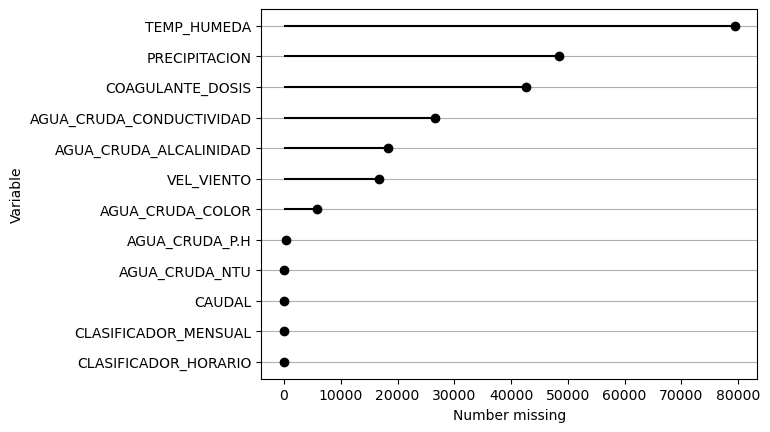

In [38]:
df.missing.missing_variable_plot()

**Casos/ Observaciones/ Filas**

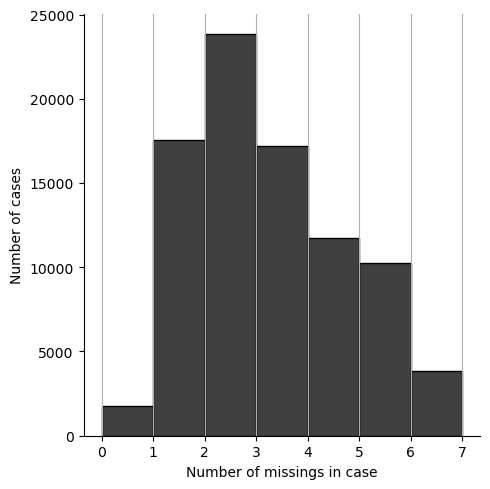

In [39]:
df.missing.missing_case_plot()

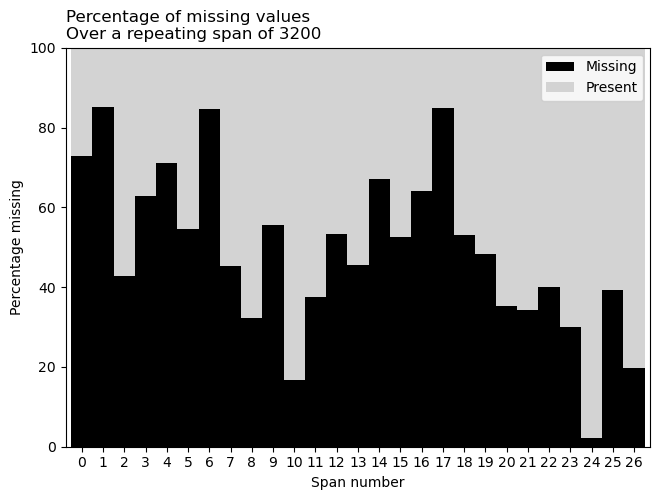

In [40]:
(
    df
    .missing
    .missing_variable_span_plot(
        variable = 'COAGULANTE_DOSIS',
        span_every = 3200,
        rot = 0
    )
)

<AxesSubplot:>

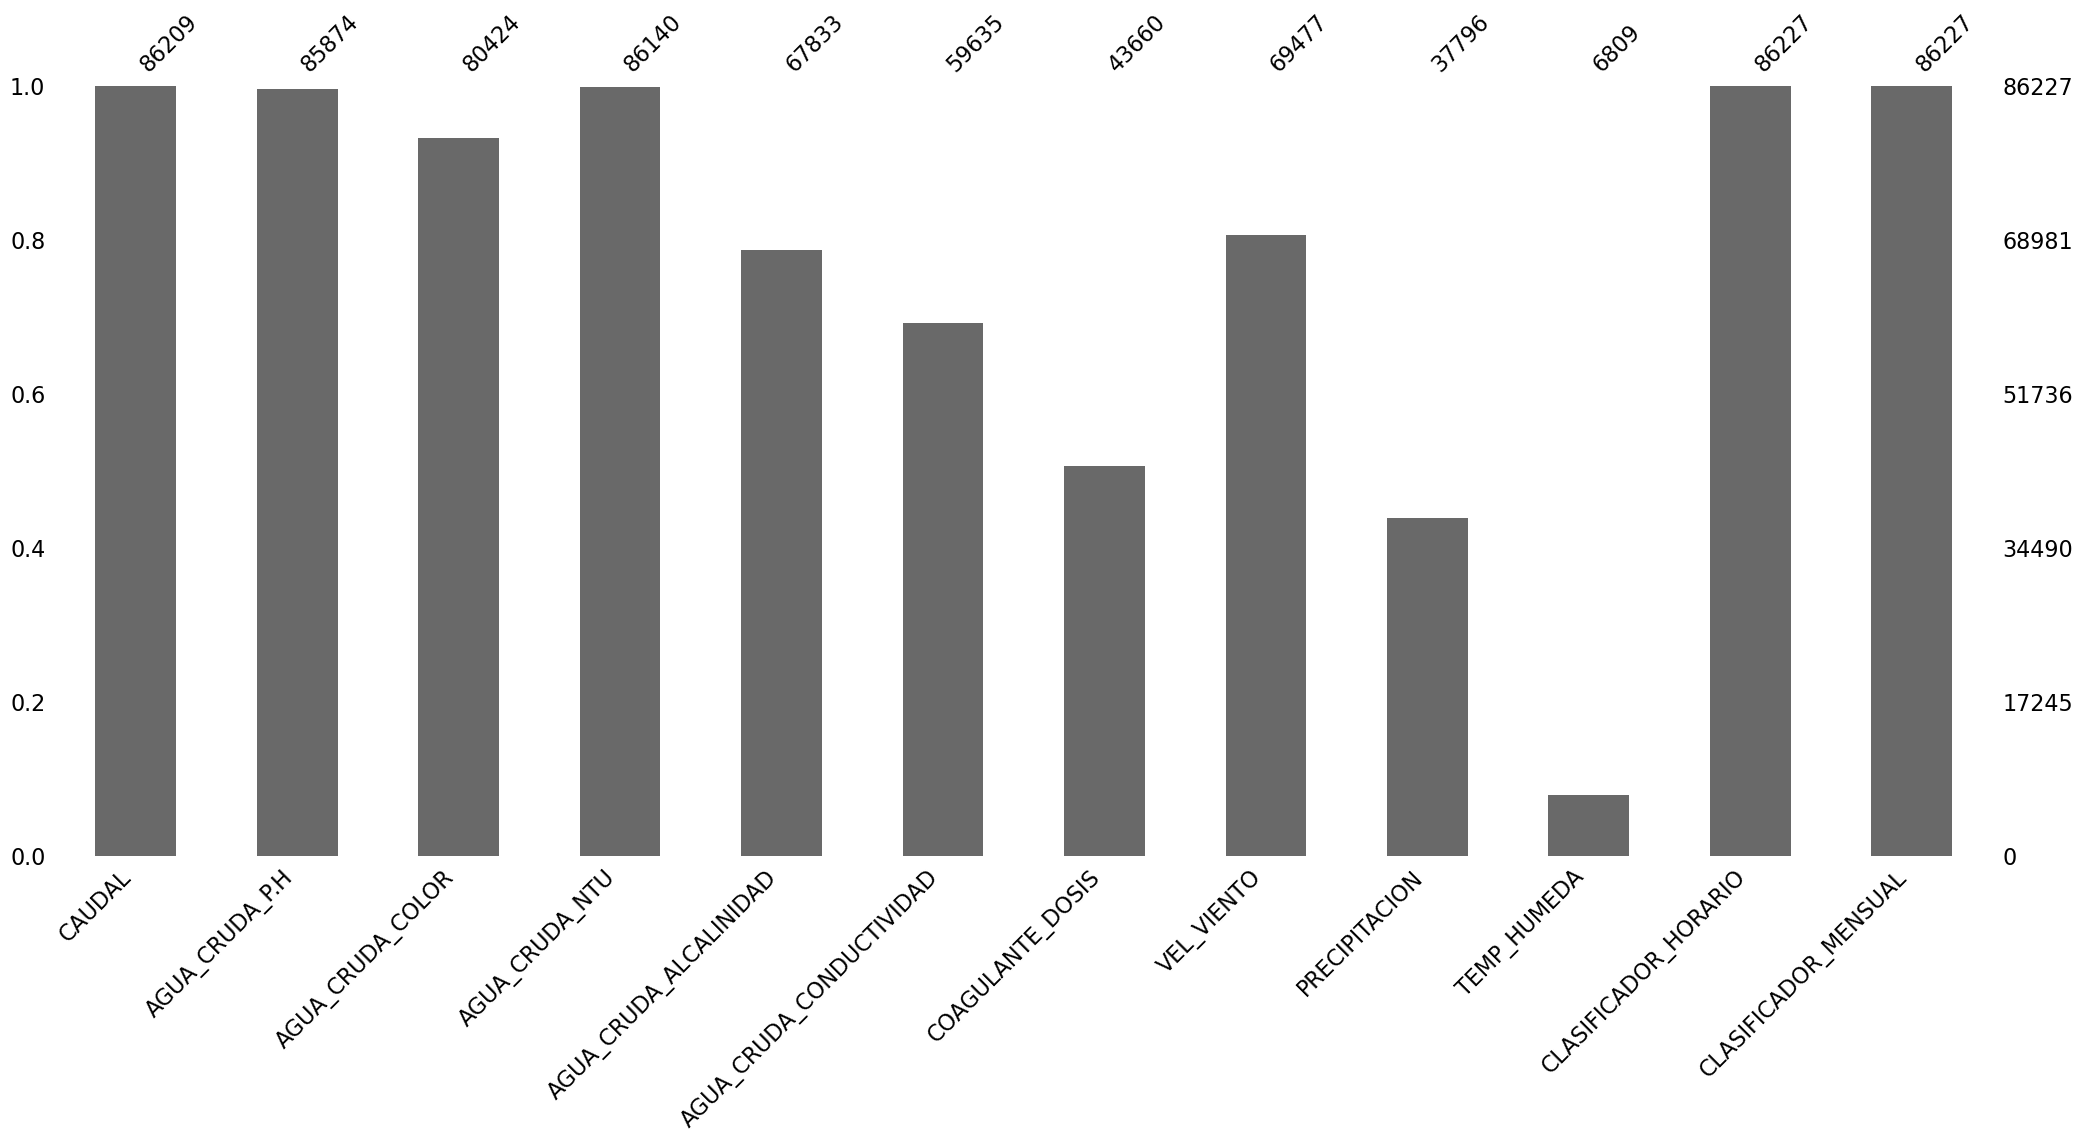

In [41]:
missingno.bar(df = df)

<AxesSubplot:>

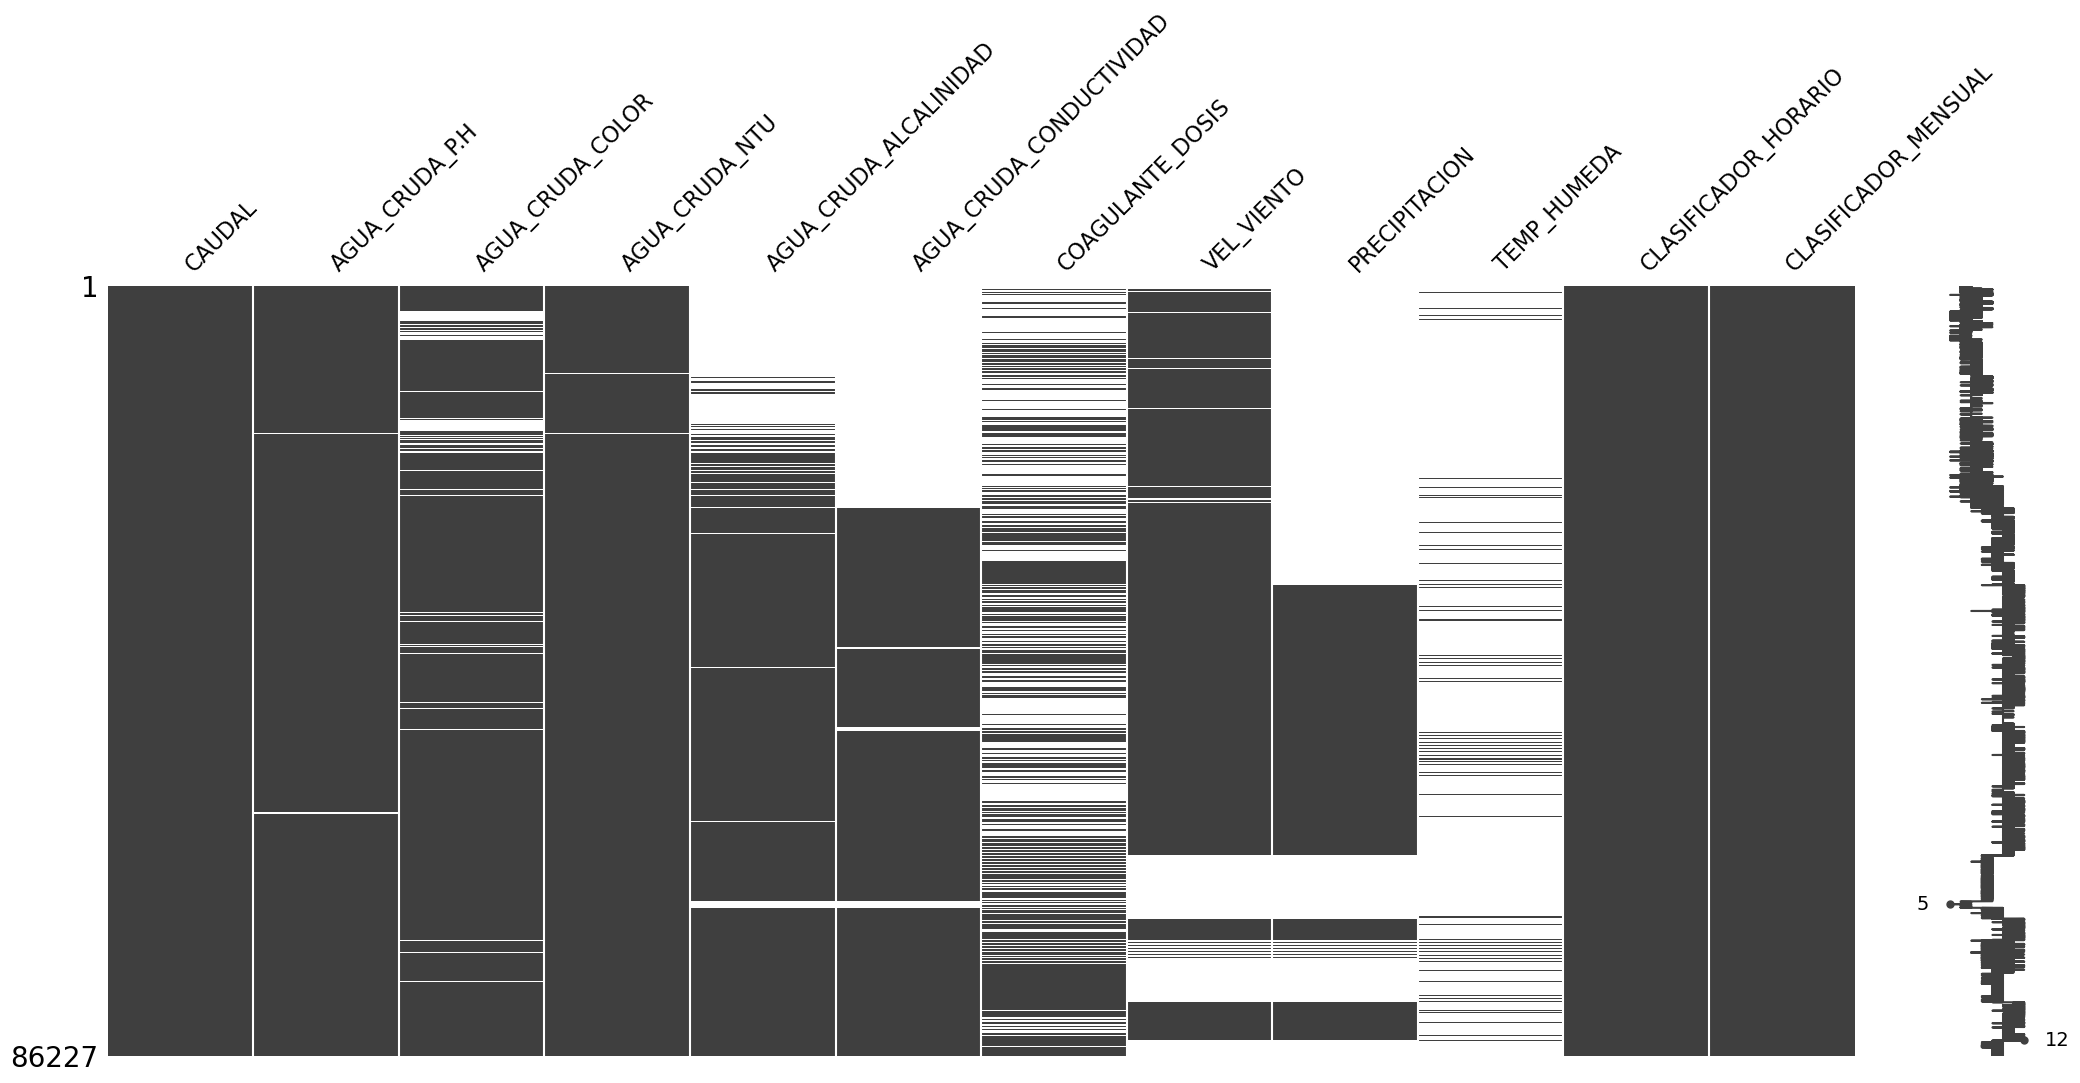

In [42]:
missingno.matrix(df = df)

<AxesSubplot:>

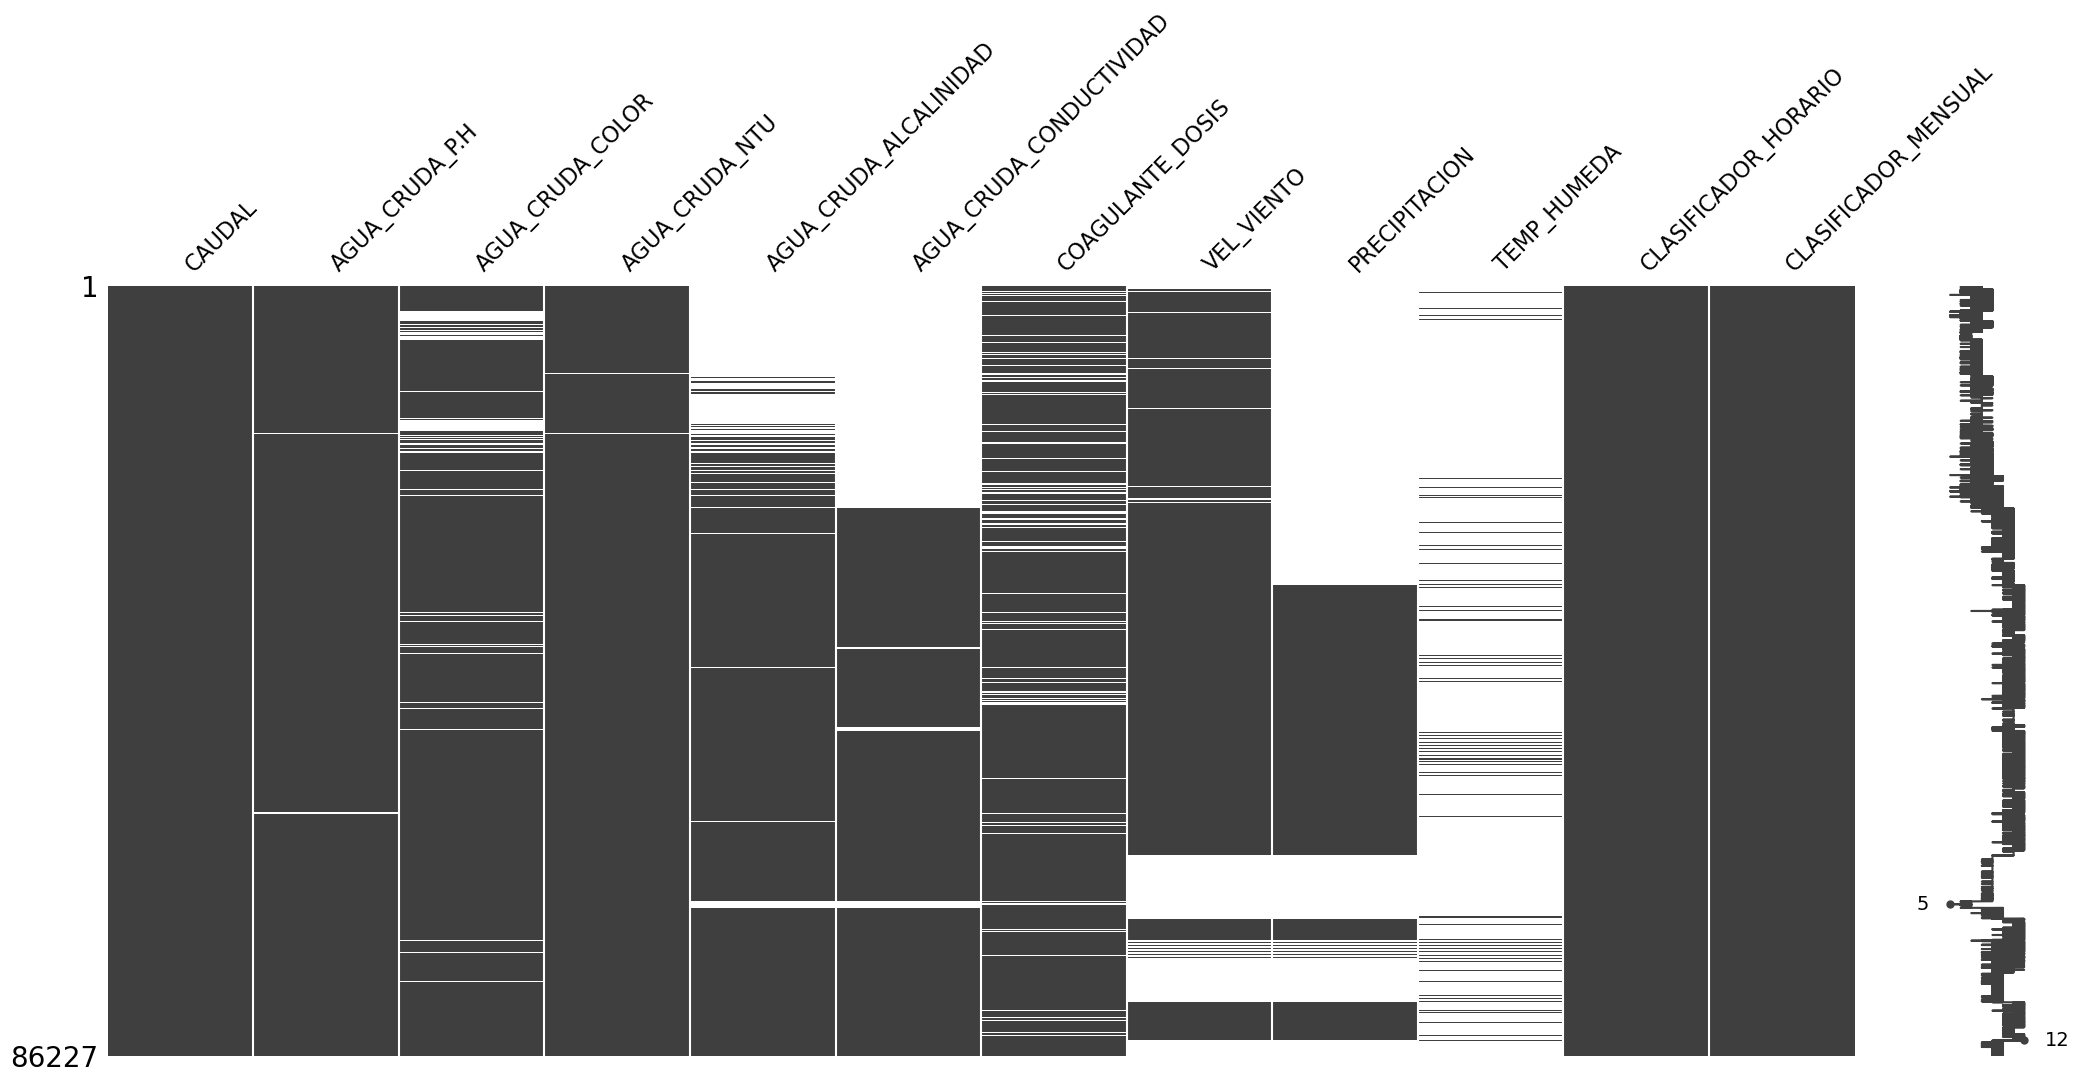

In [43]:
missingno.matrix(df = df_edit)

<AxesSubplot:>

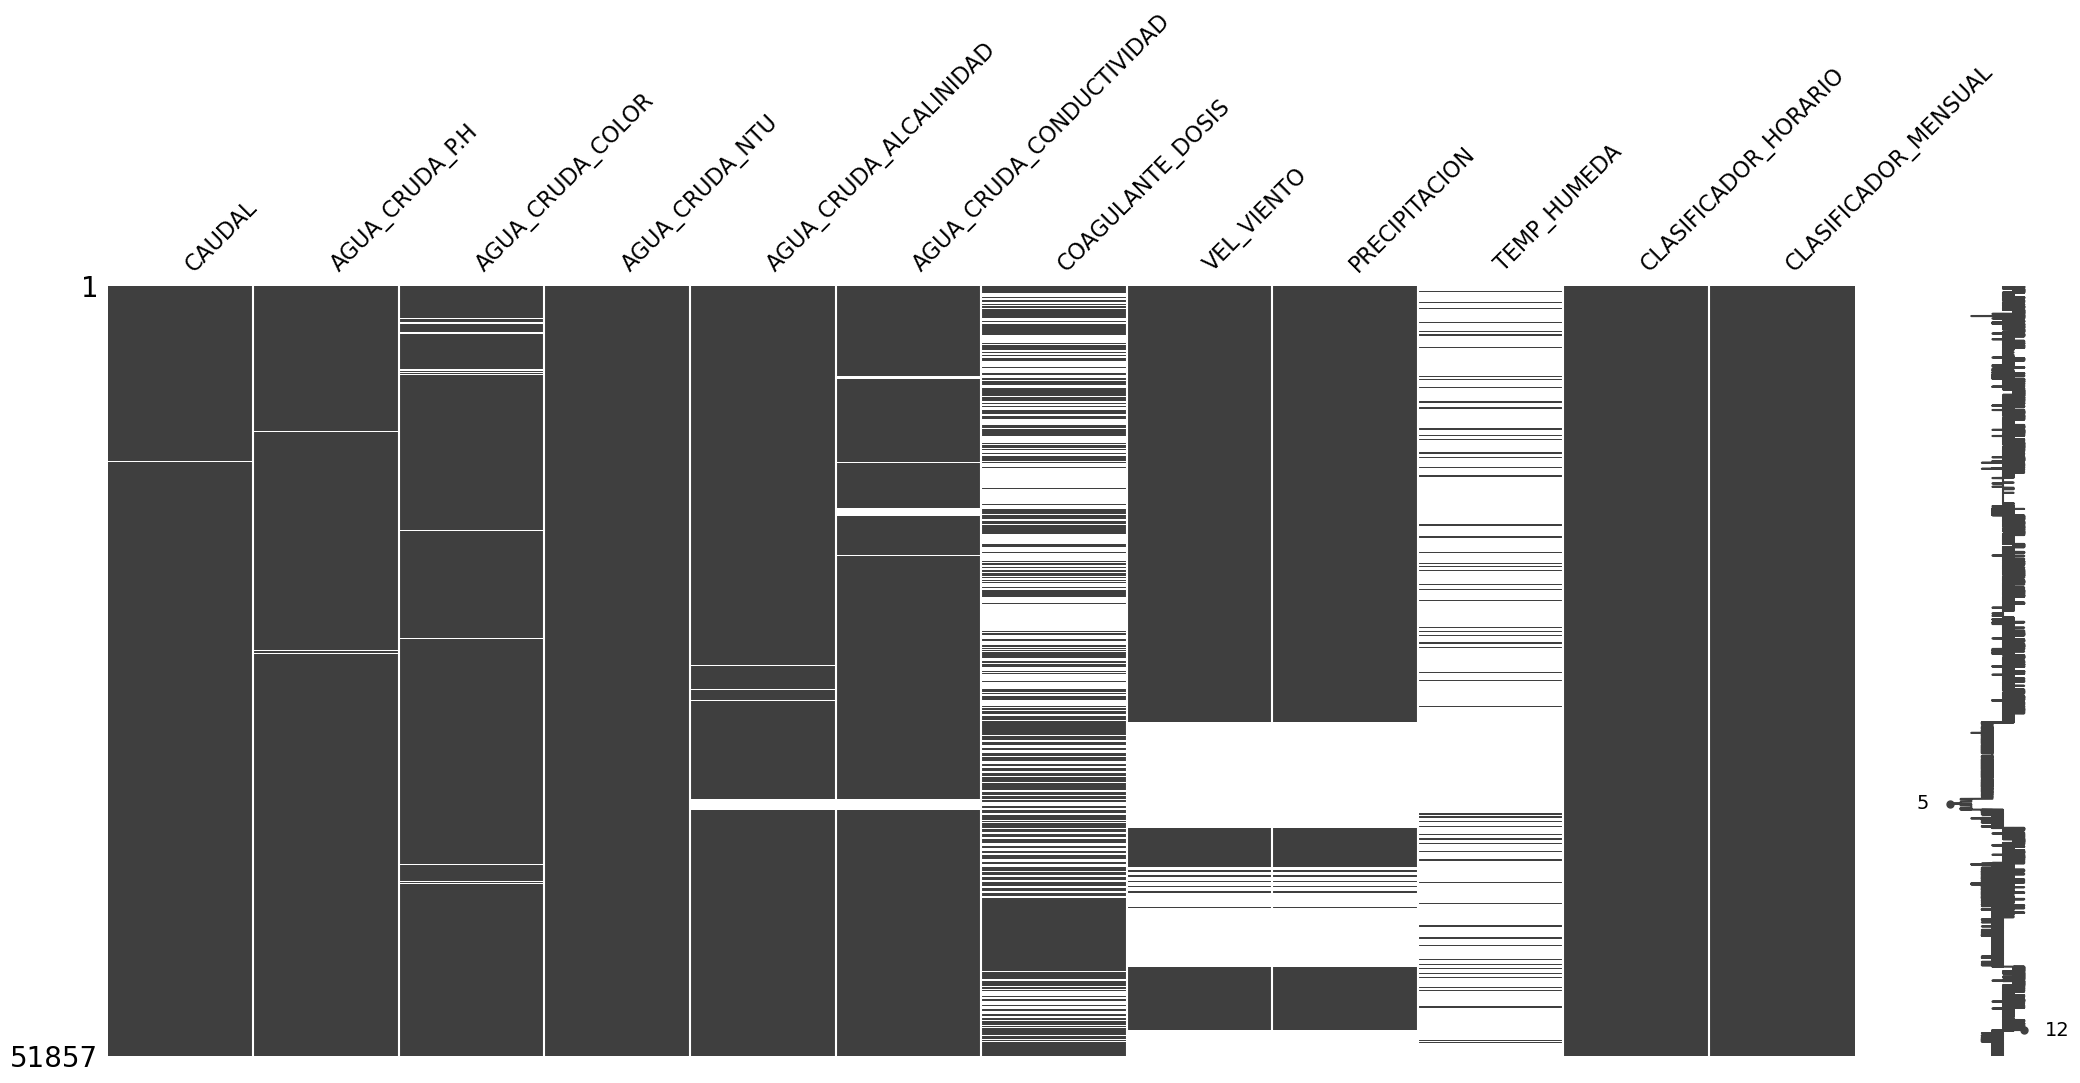

In [44]:
missingno.matrix(df = df_2017)

<AxesSubplot:>

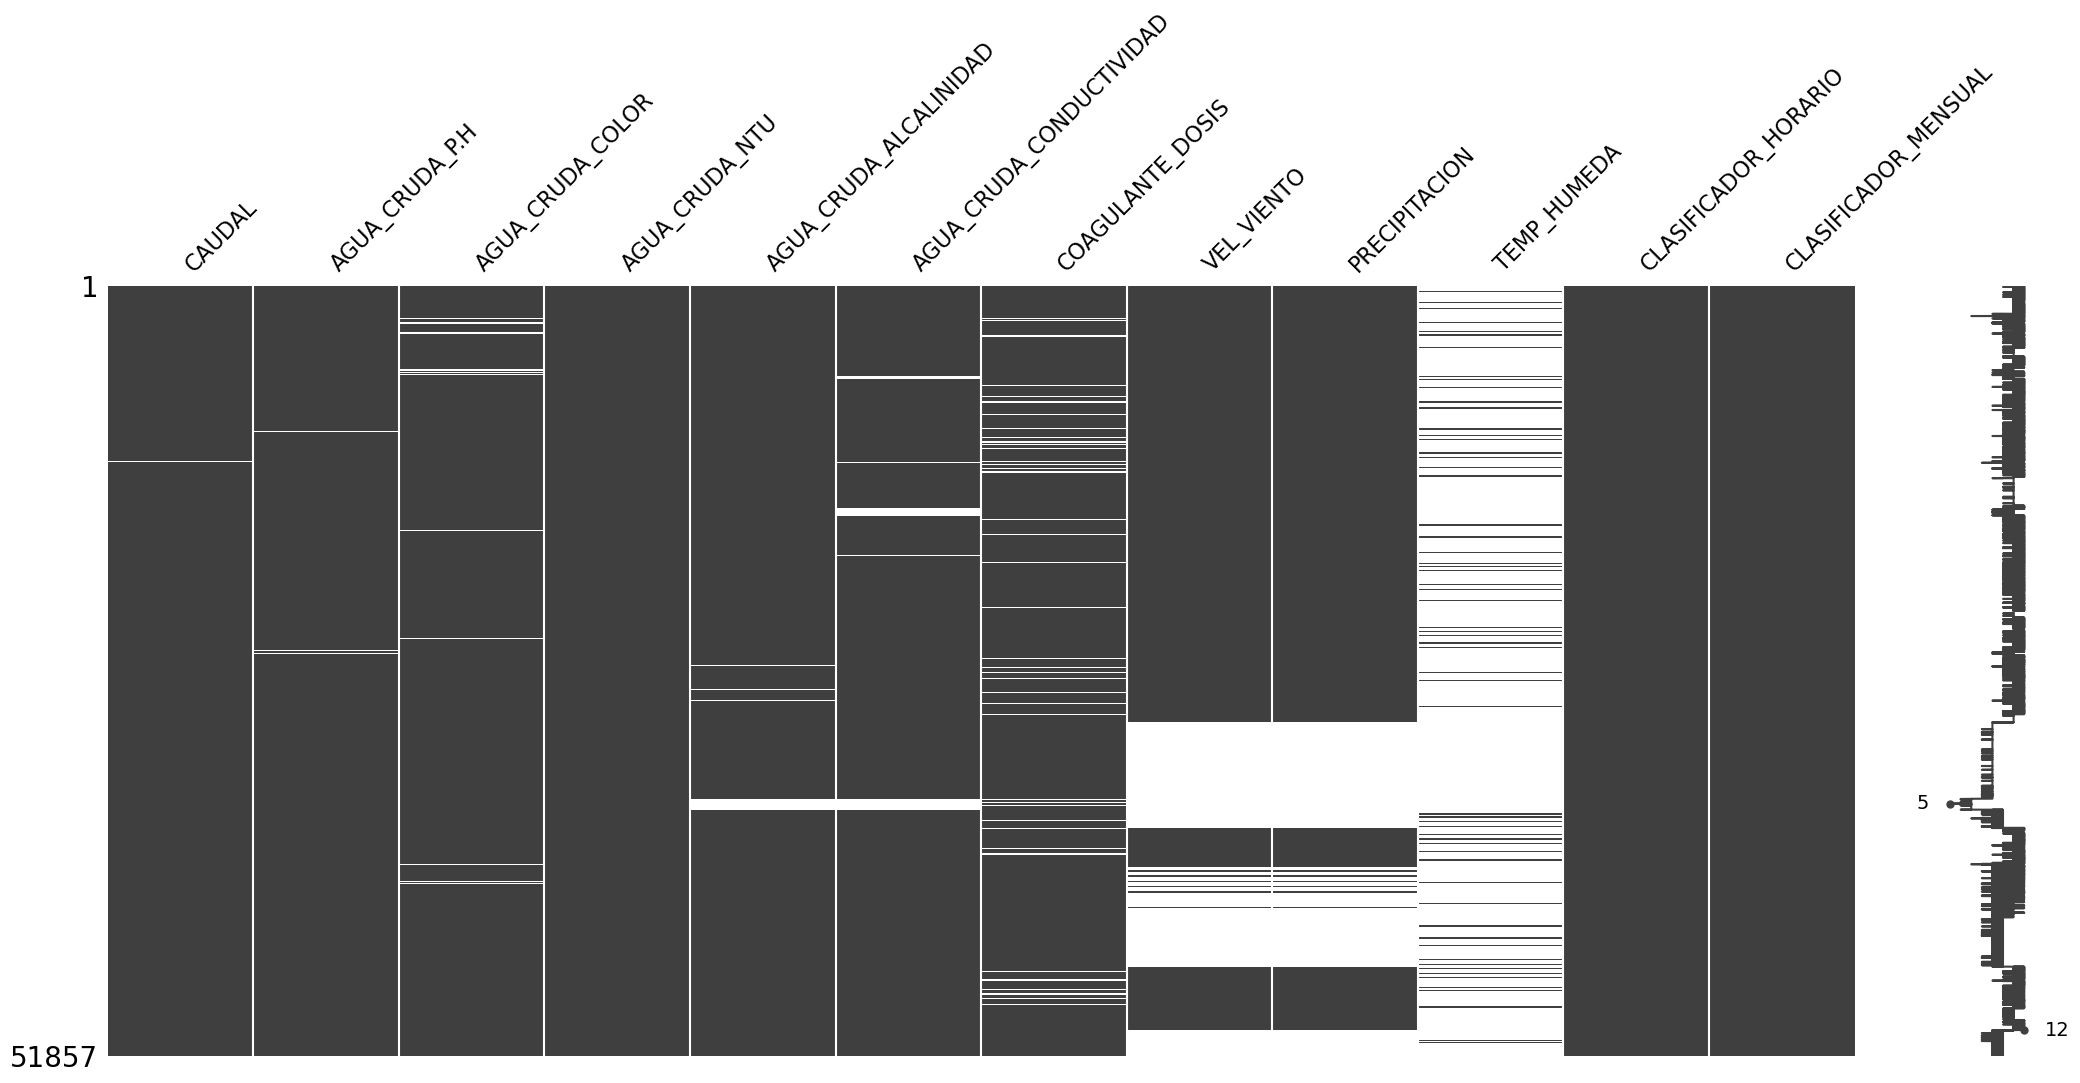

In [45]:
missingno.matrix(df = df_edit_2017)

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

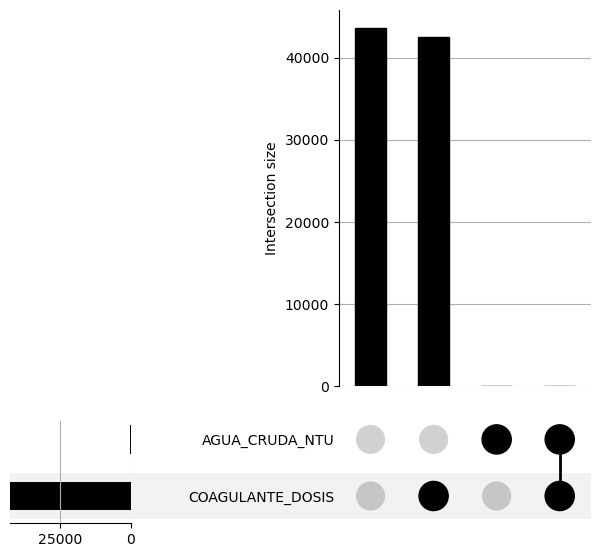

In [46]:
(
    df
    .missing
    .missing_upsetplot(
        variables = ['COAGULANTE_DOSIS','AGUA_CRUDA_NTU'],
        element_size = 60
    )
)

### Missing Completely At Random (MCAR)

<AxesSubplot:>

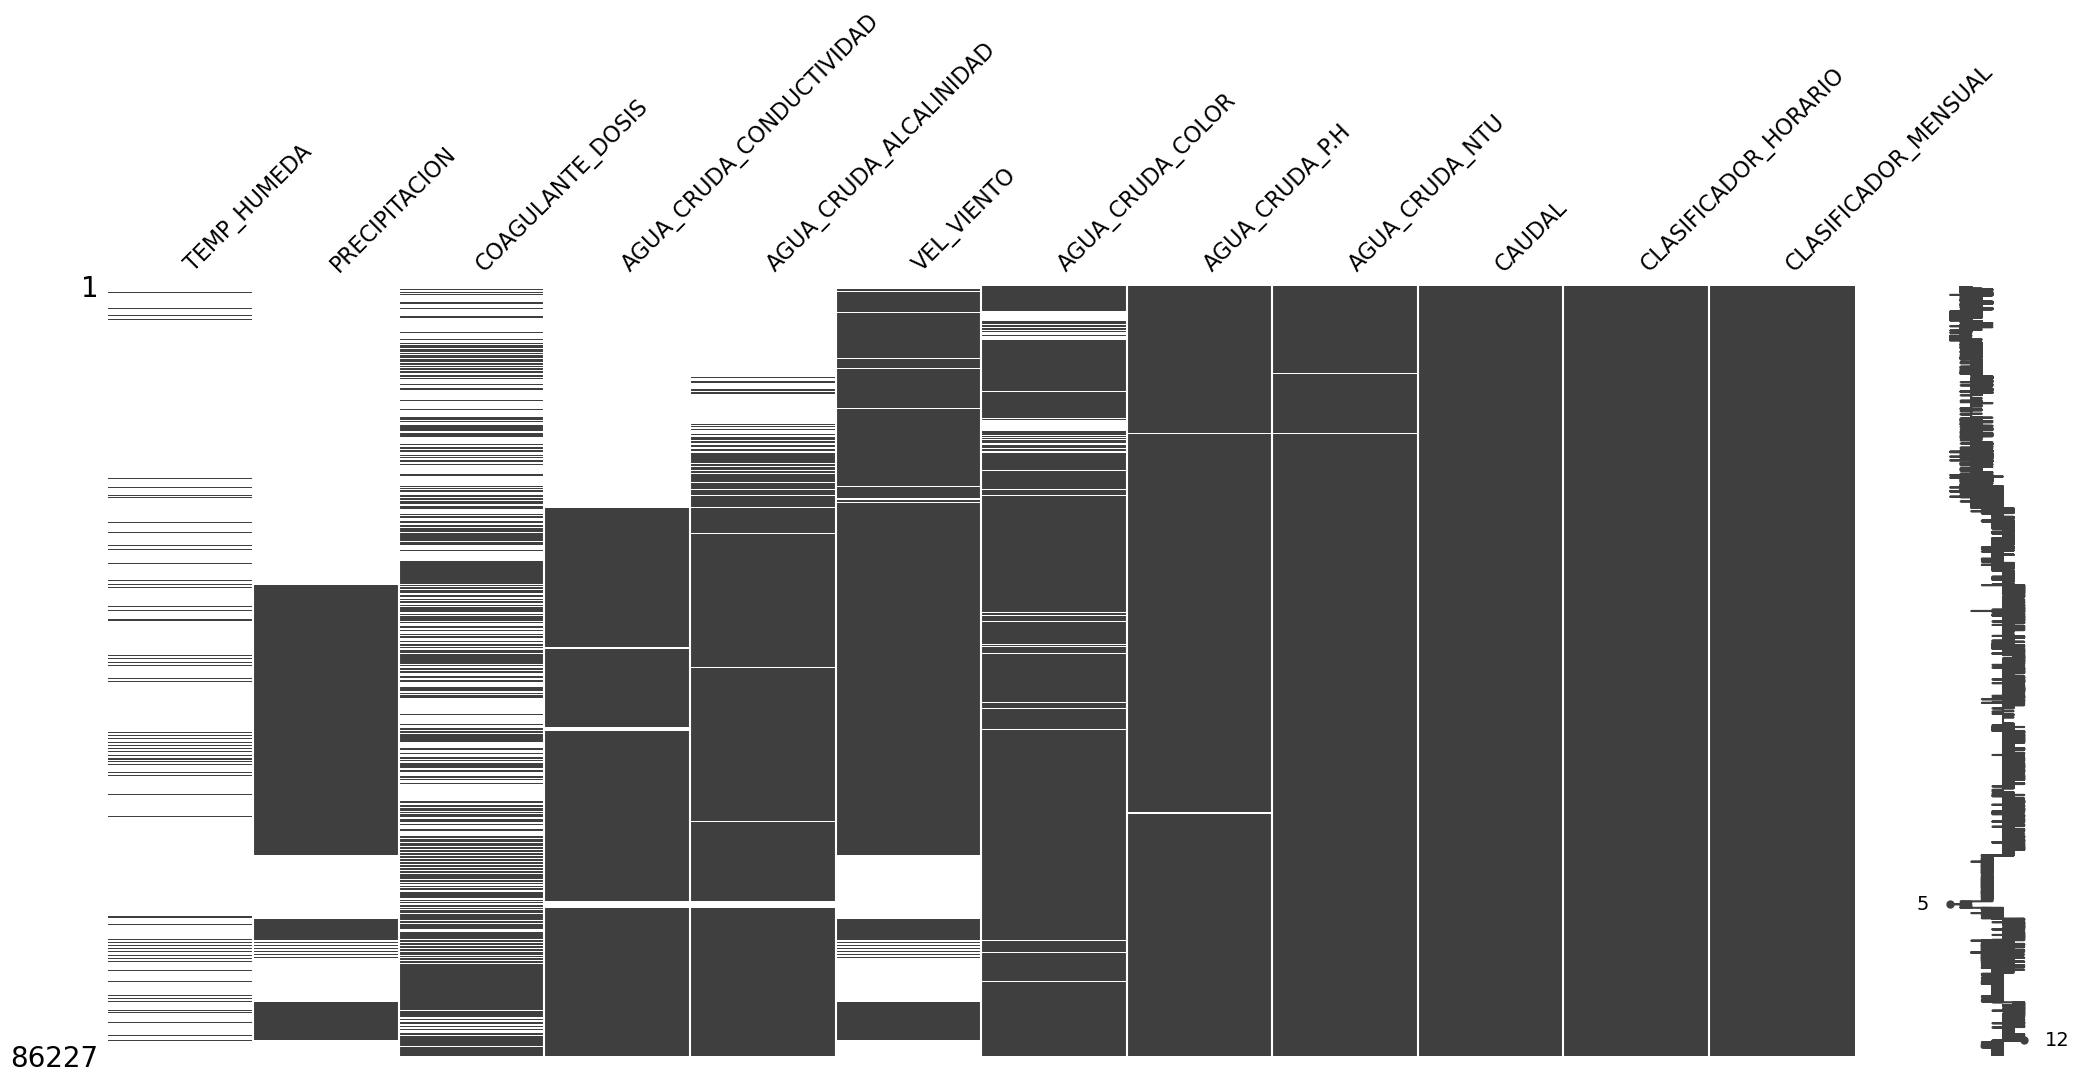

In [47]:
(
    df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix)
)

<AxesSubplot:>

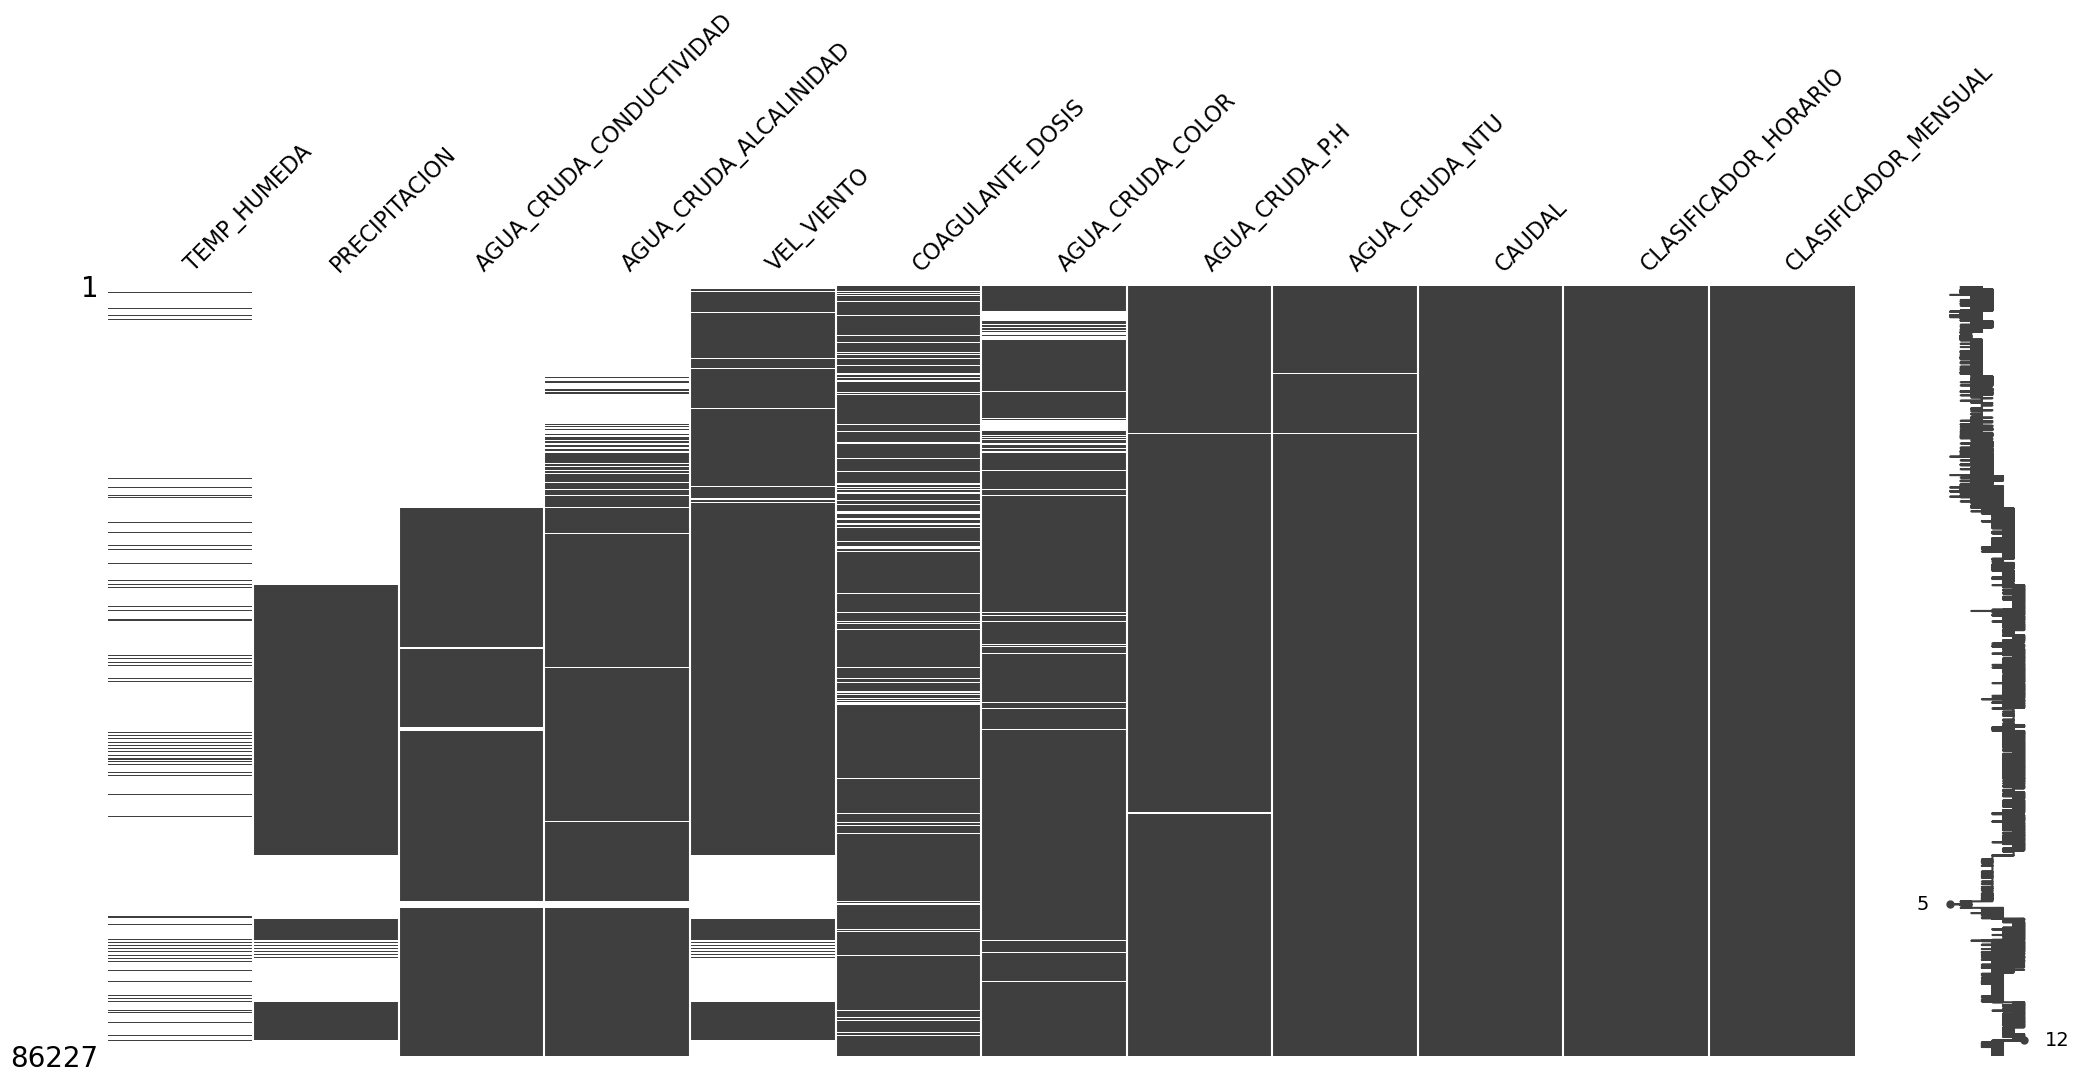

In [48]:
(
    df_edit
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix)
)

<AxesSubplot:>

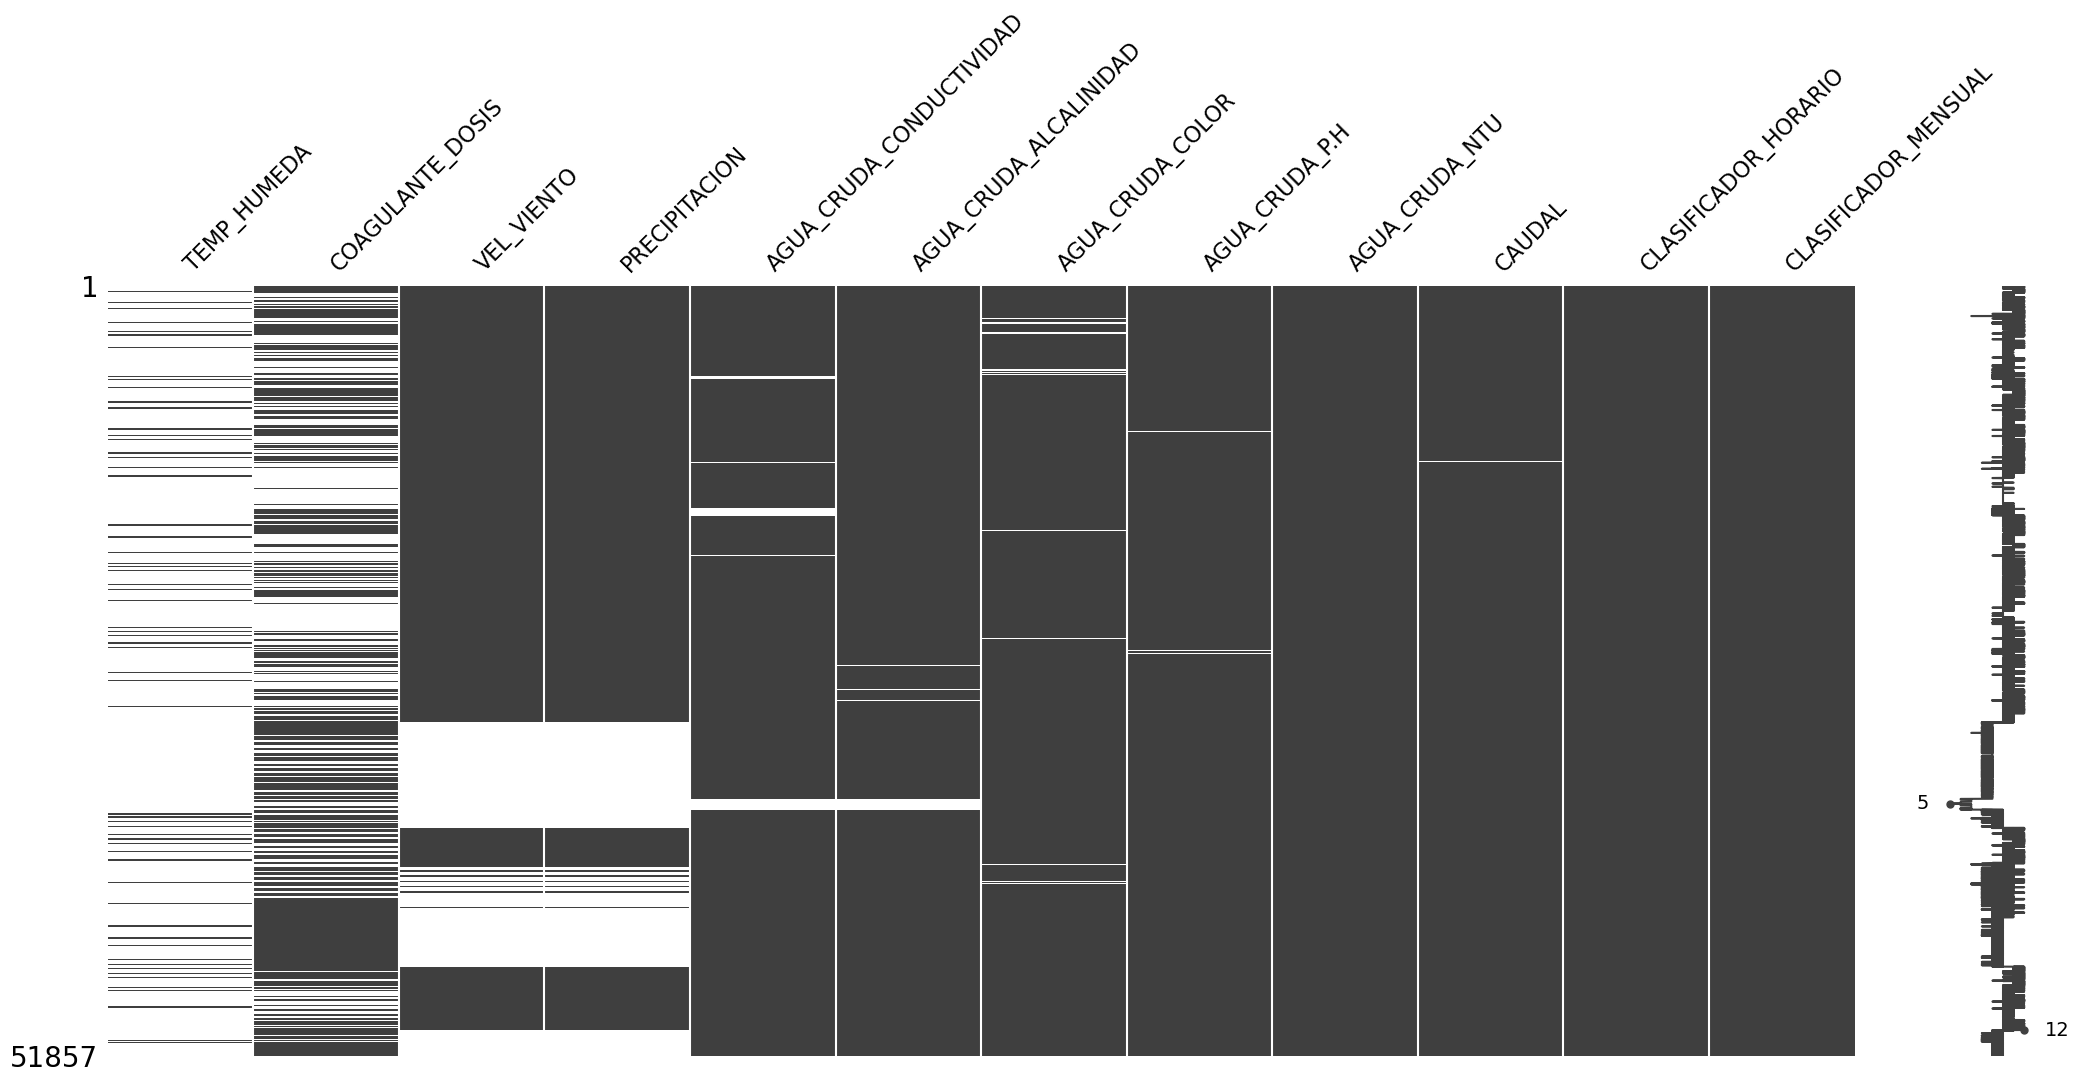

In [49]:
(
    df_2017
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix)
)

<AxesSubplot:>

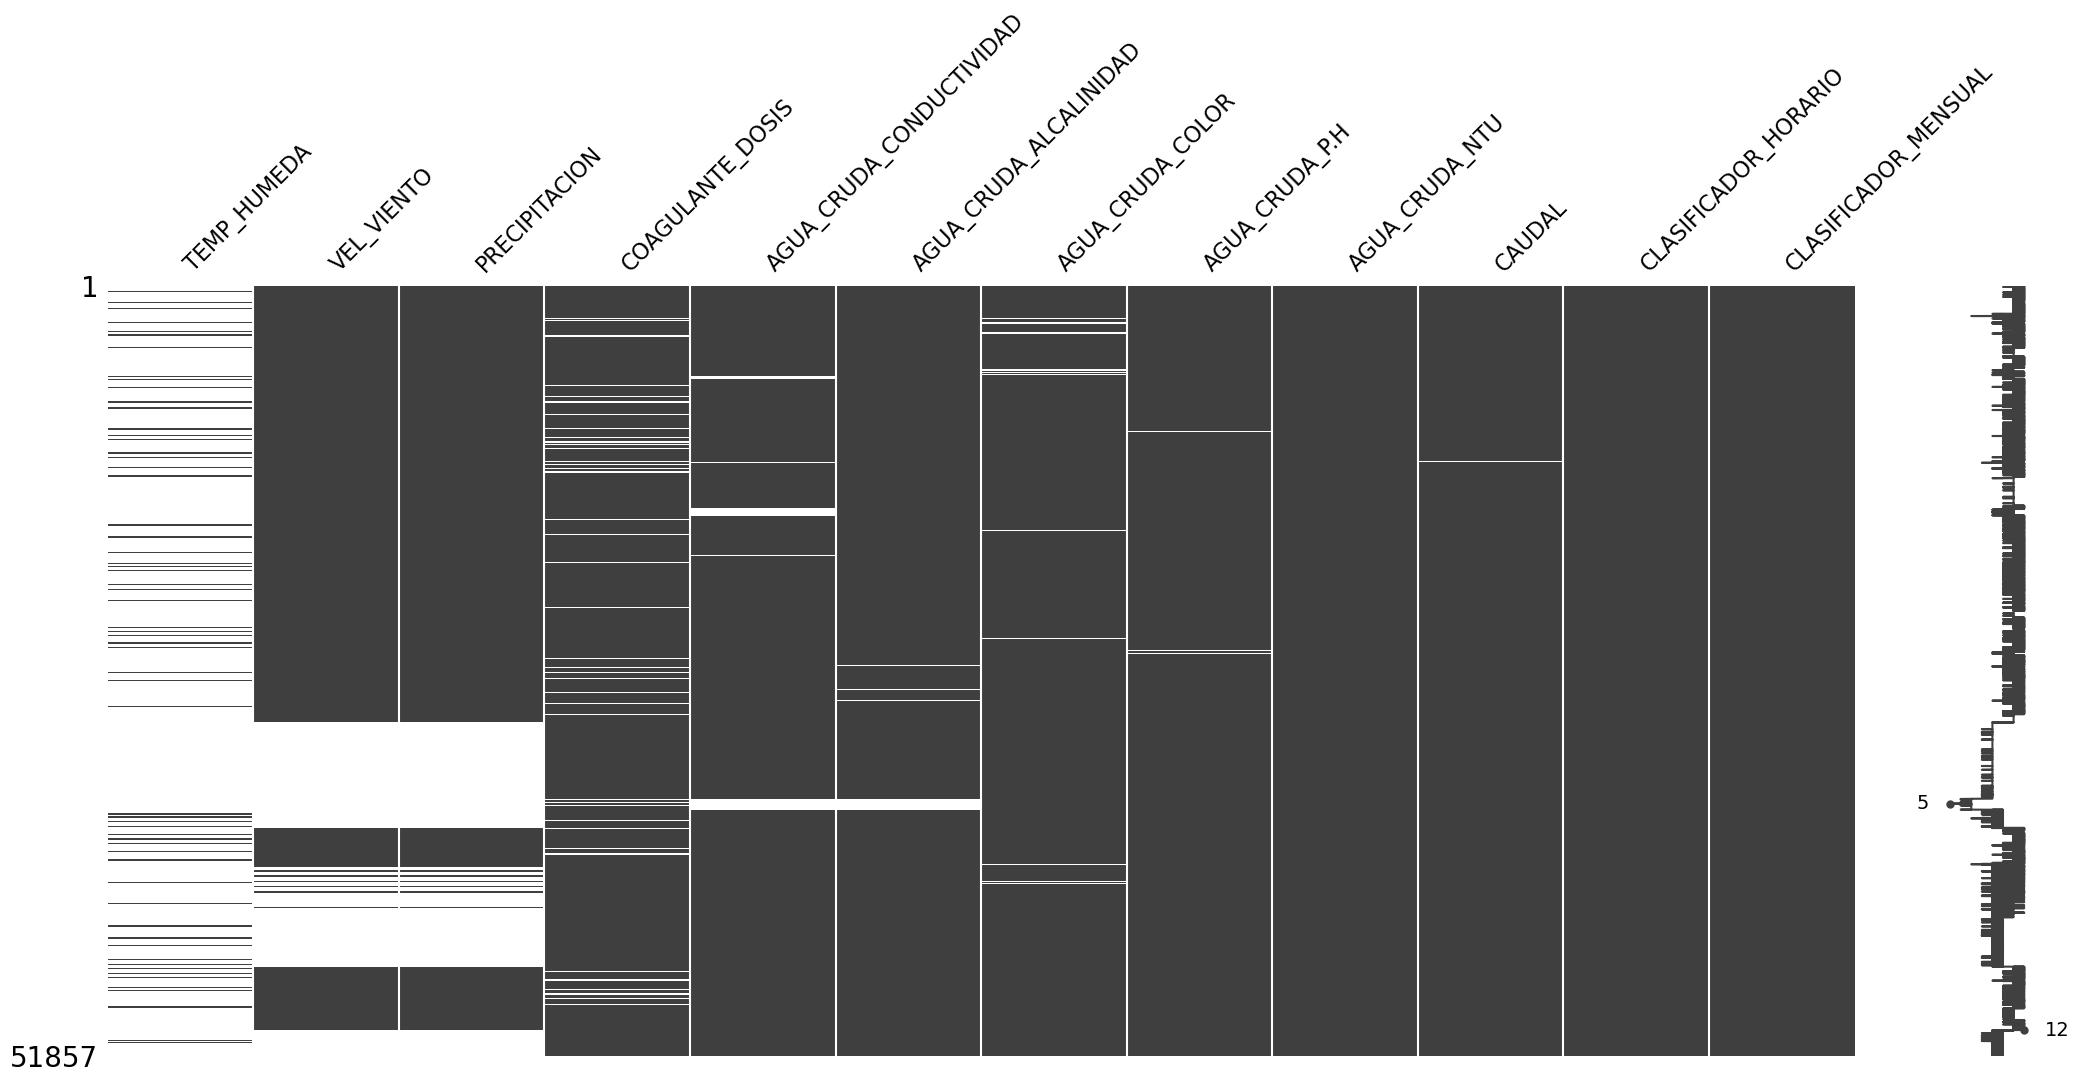

In [50]:
(
    df_edit_2017
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix)
)

### Missing At Random (MAR)

<AxesSubplot:>

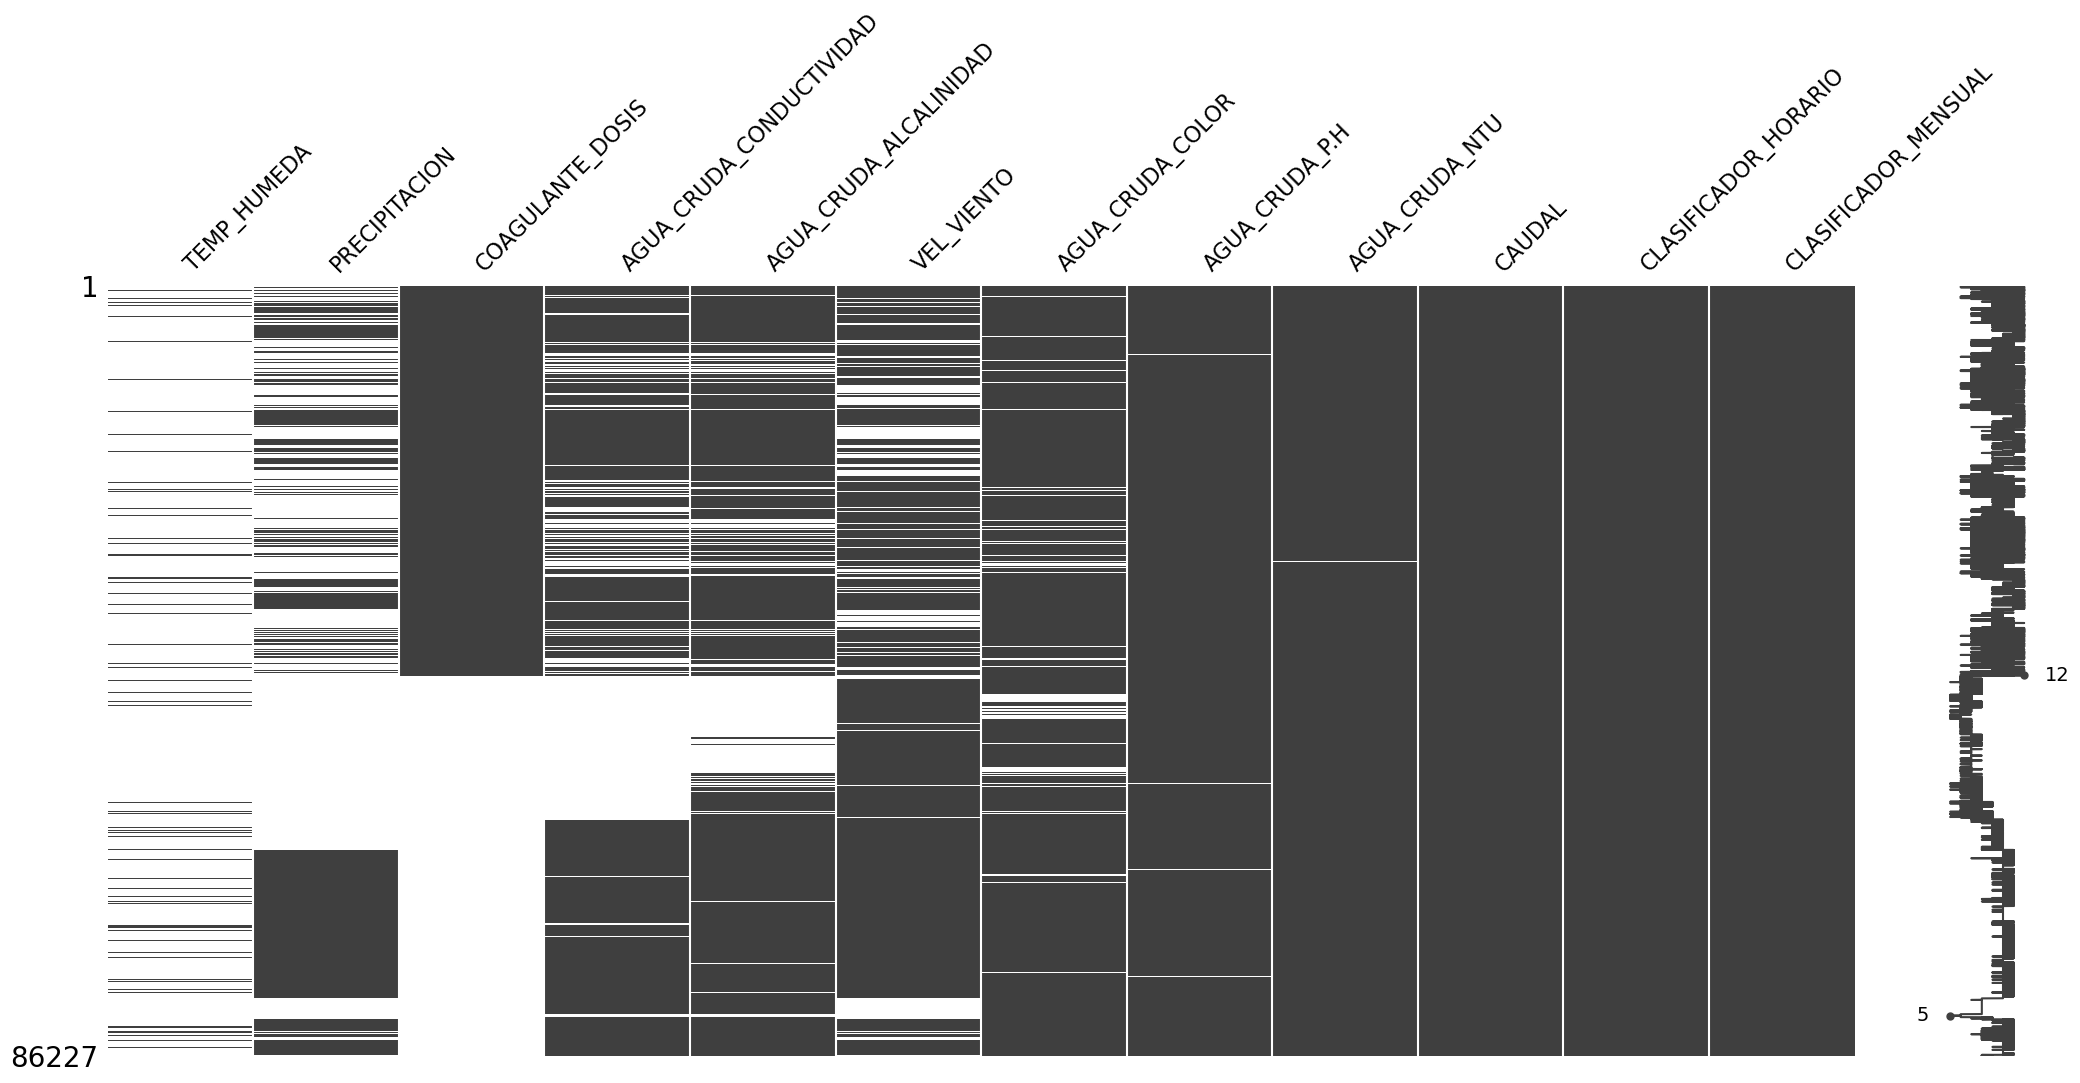

In [51]:
(
    df
    .missing.sort_variables_by_missingness()
    .sort_values(by = "COAGULANTE_DOSIS")
    .pipe(missingno.matrix)
)

<AxesSubplot:>

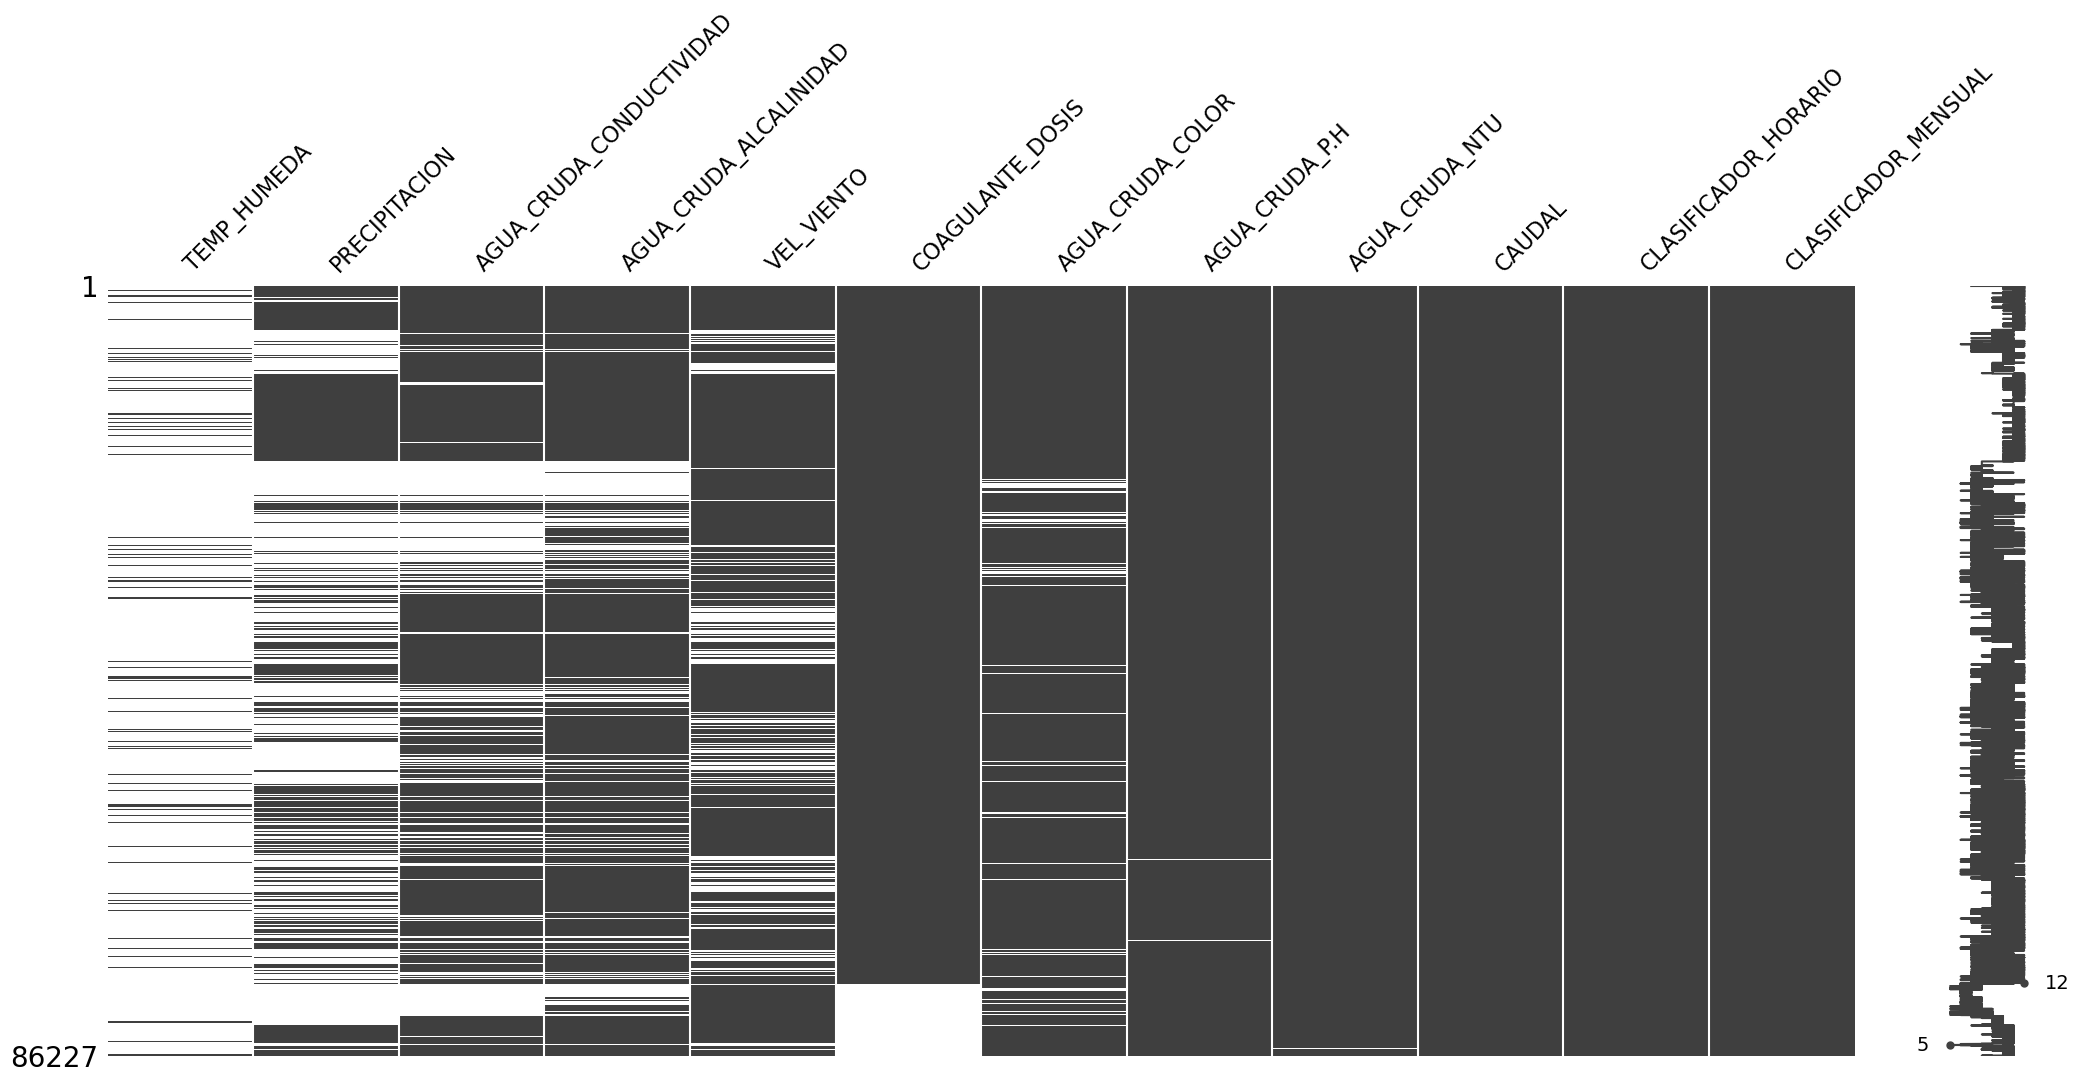

In [52]:
(
    df_edit
    .missing.sort_variables_by_missingness()
    .sort_values(by = "COAGULANTE_DOSIS")
    .pipe(missingno.matrix)
)

<AxesSubplot:>

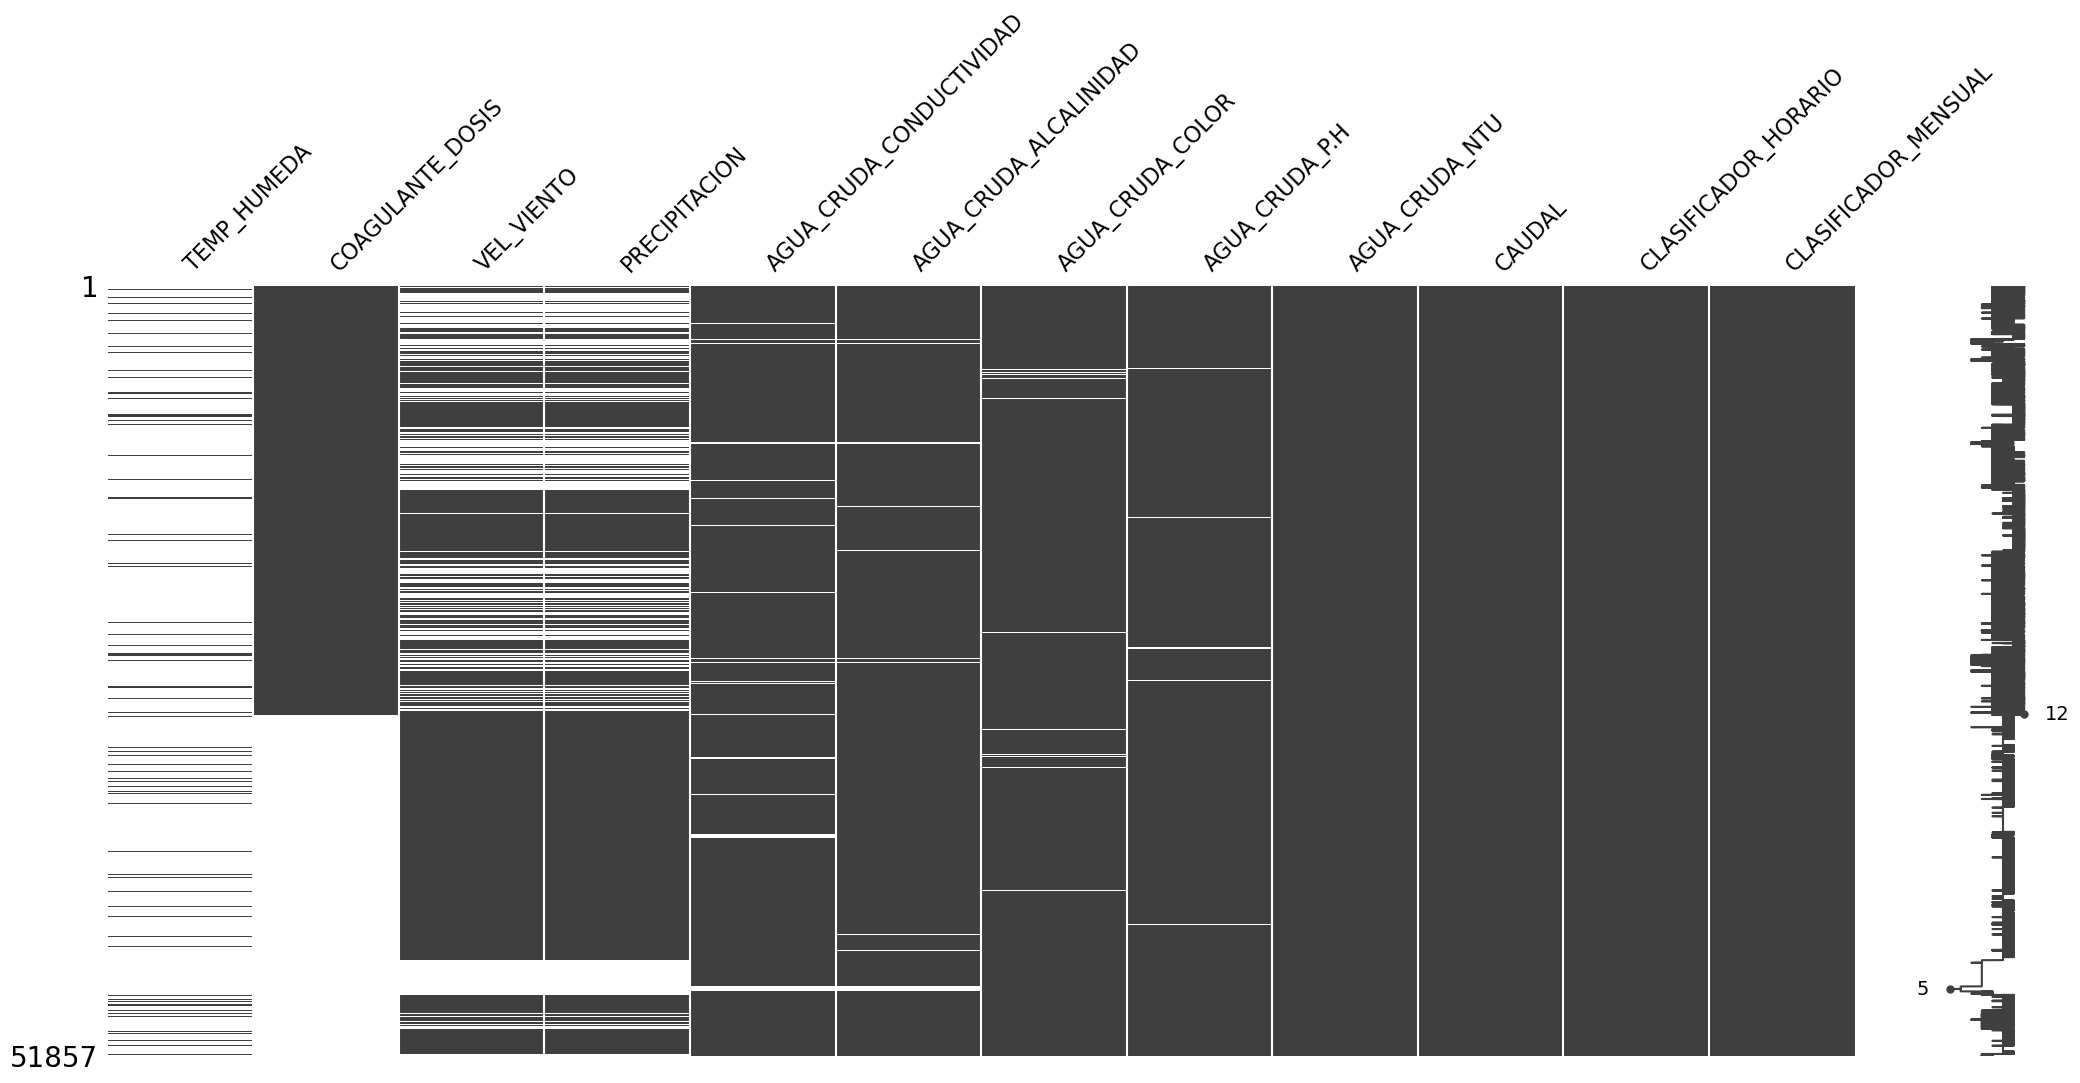

In [53]:
(
    df_2017
    .missing.sort_variables_by_missingness()
    .sort_values(by = "COAGULANTE_DOSIS")
    .pipe(missingno.matrix)
)

<AxesSubplot:>

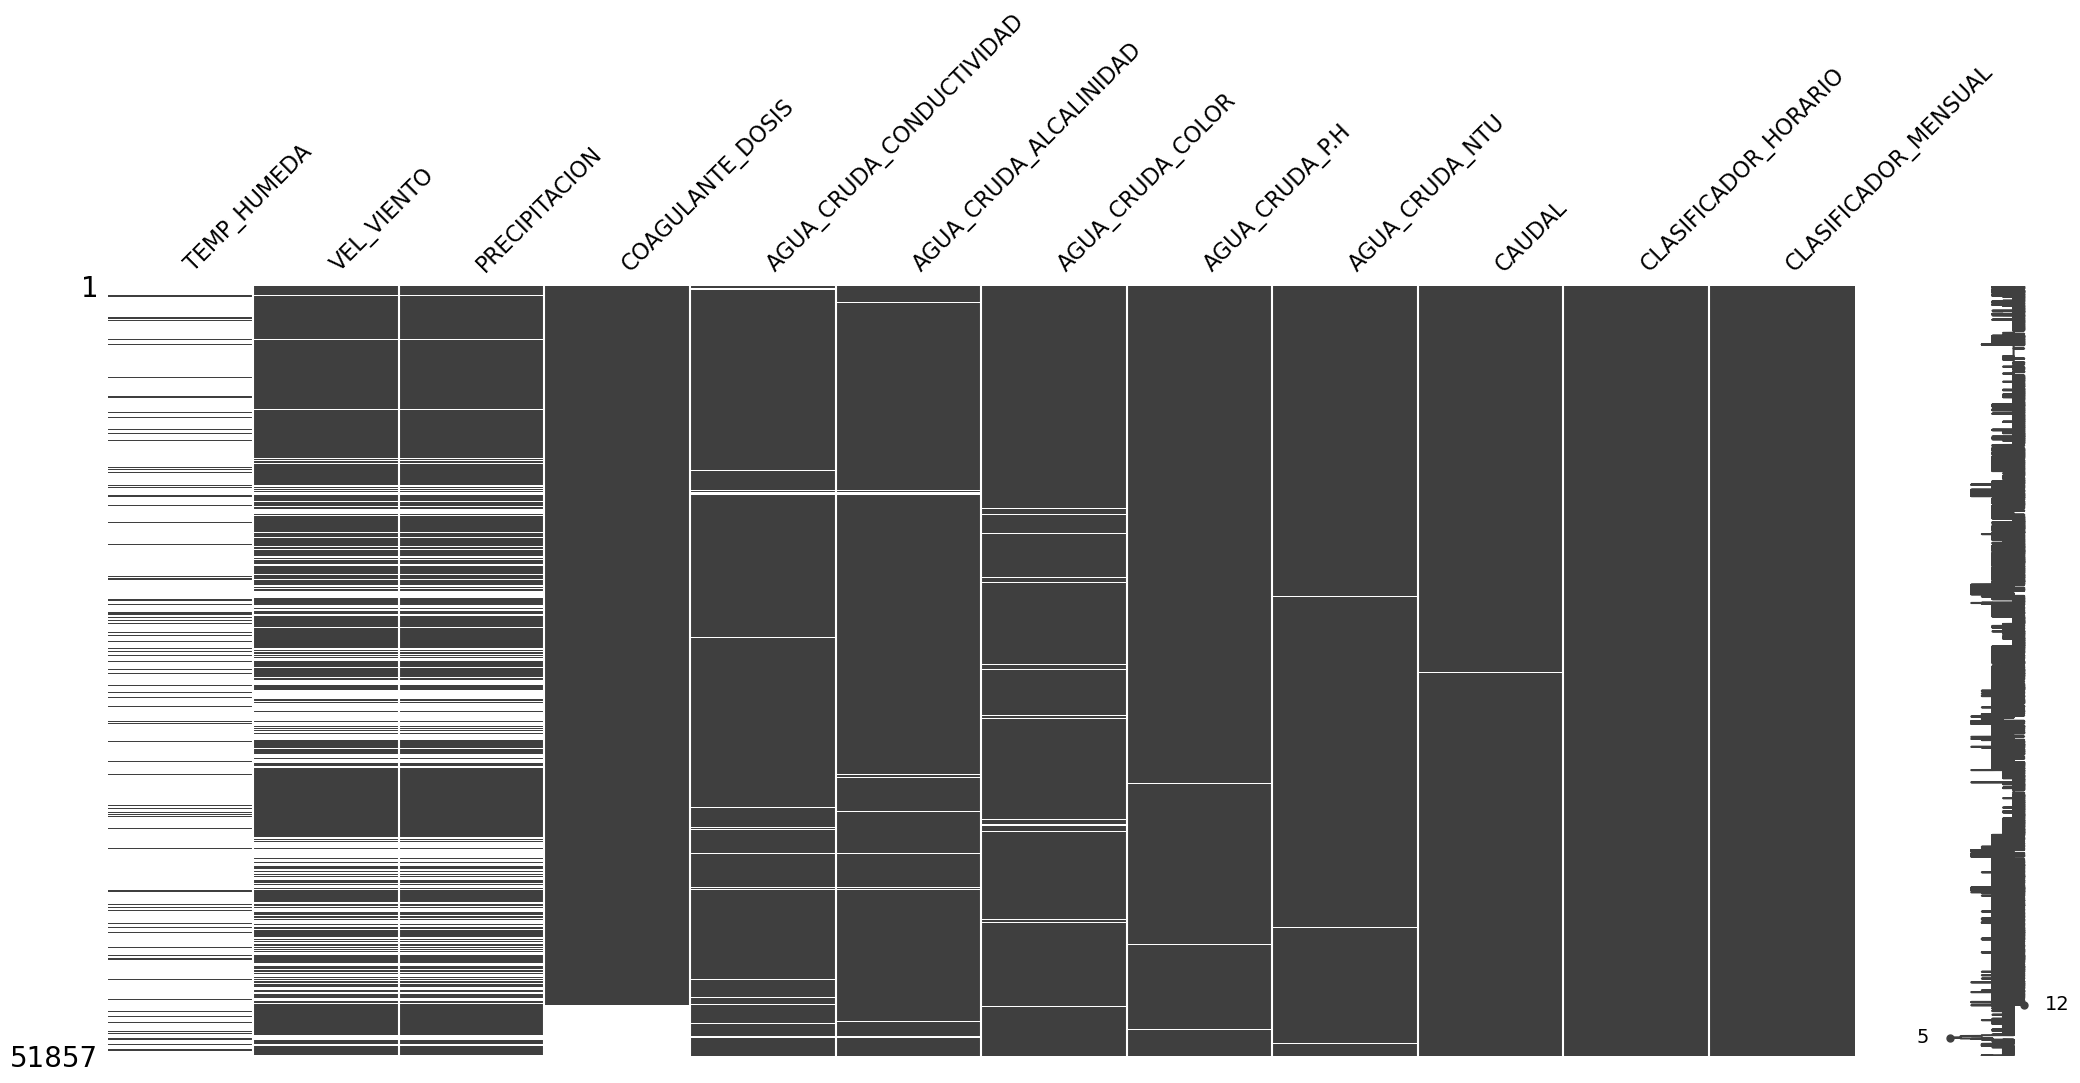

In [54]:
(
    df_edit_2017
    .missing.sort_variables_by_missingness()
    .sort_values(by = "COAGULANTE_DOSIS")
    .pipe(missingno.matrix)
)

### Missing Not At Random (MNAR)

<AxesSubplot:>

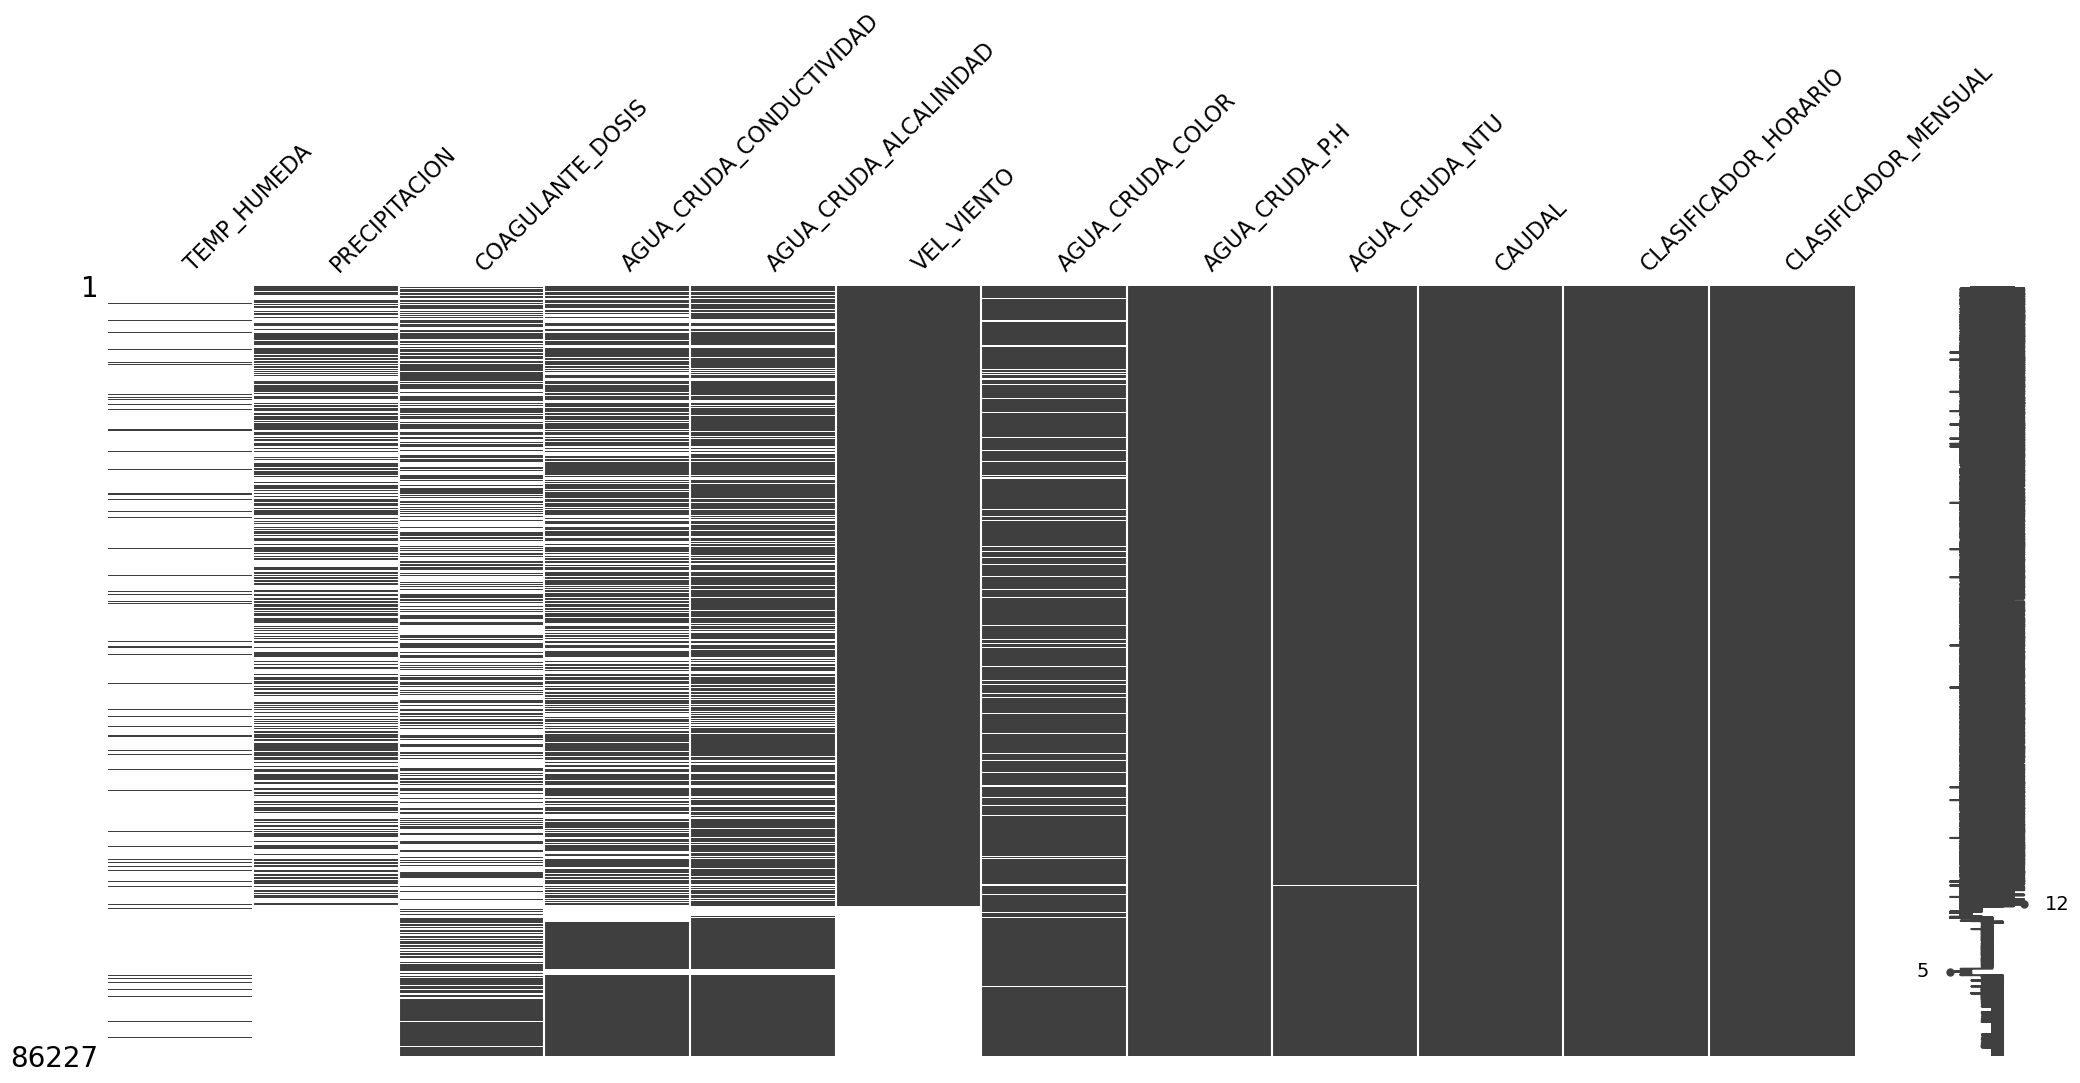

In [55]:
(
    df
    .missing.sort_variables_by_missingness()
    .sort_values(by = "VEL_VIENTO")
    .pipe(missingno.matrix)
)

<AxesSubplot:>

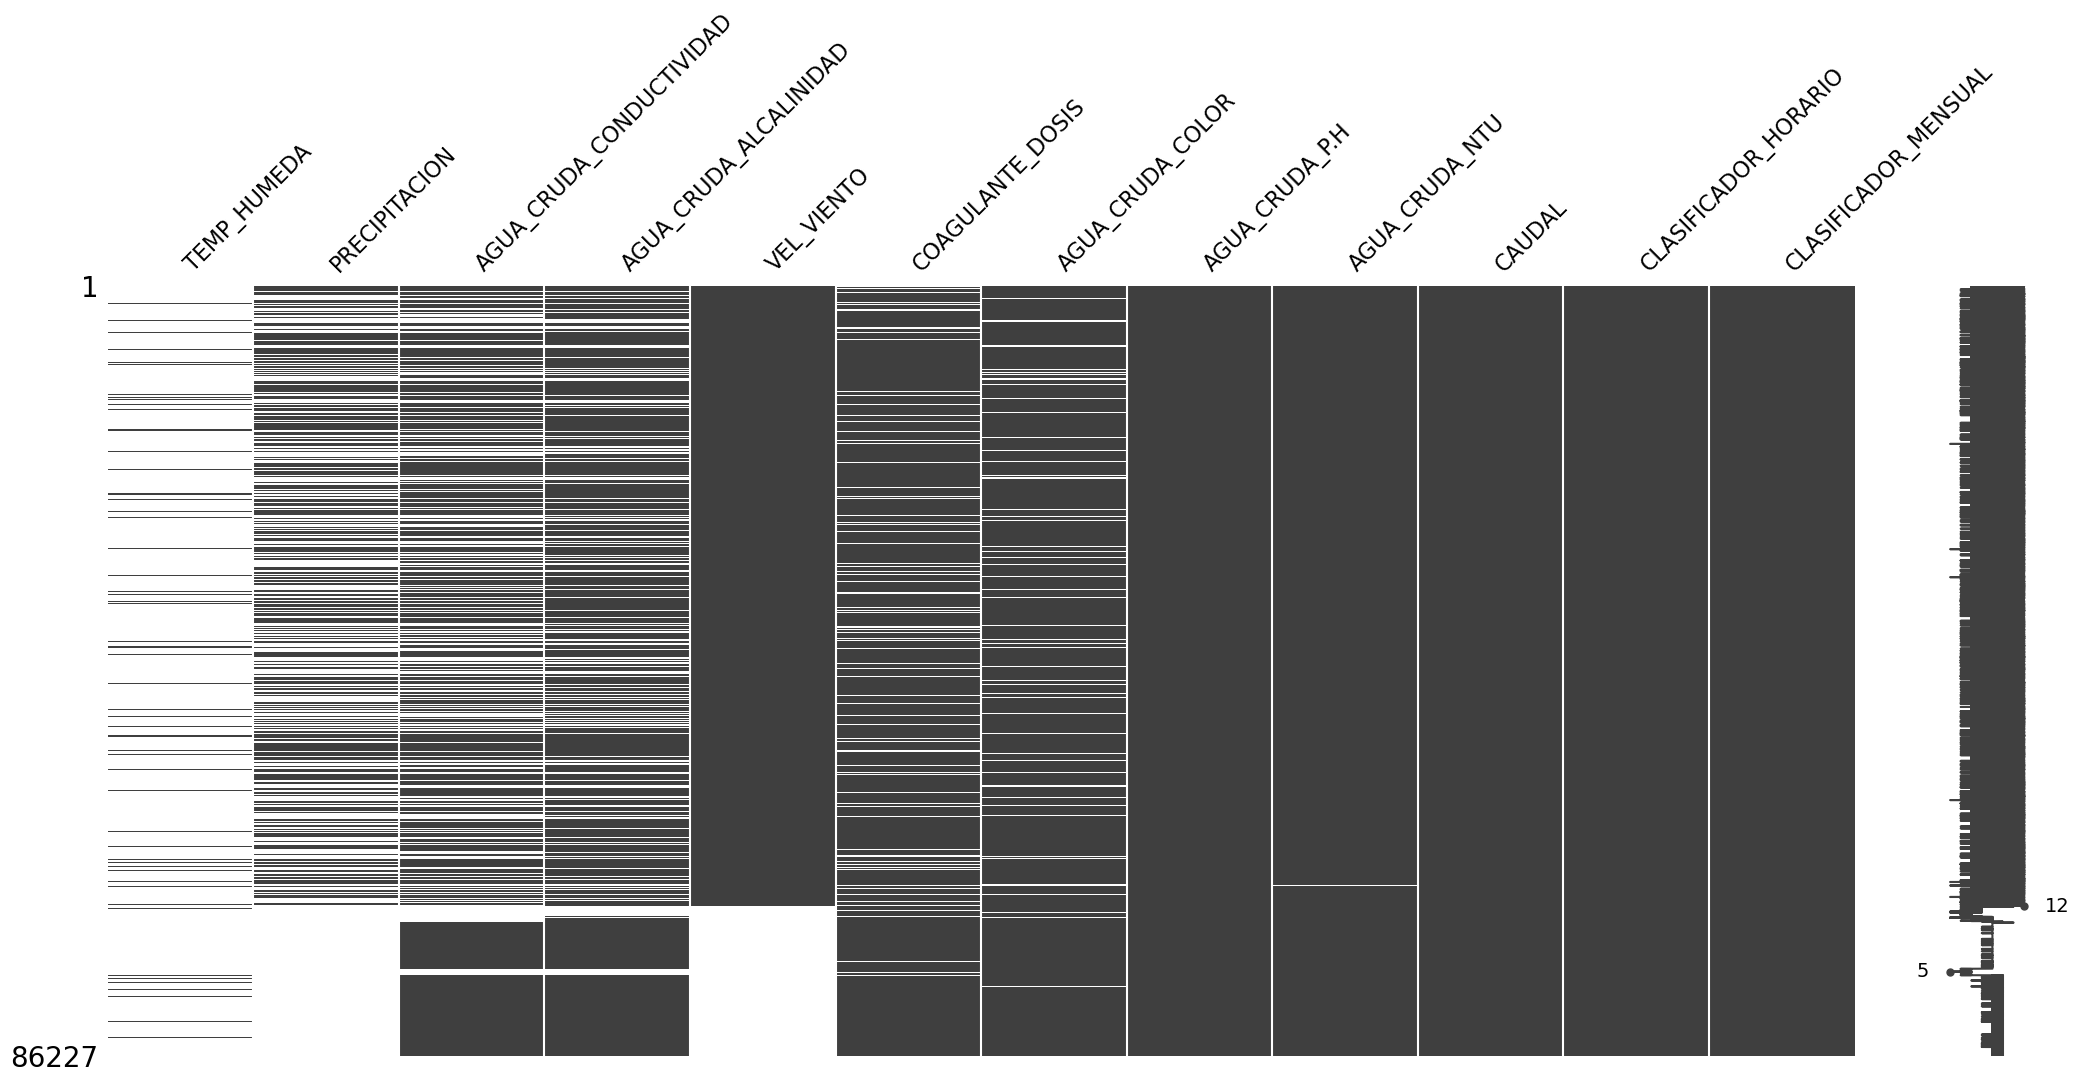

In [56]:
(
    df_edit
    .missing.sort_variables_by_missingness()
    .sort_values(by = "VEL_VIENTO")
    .pipe(missingno.matrix)
)

<AxesSubplot:>

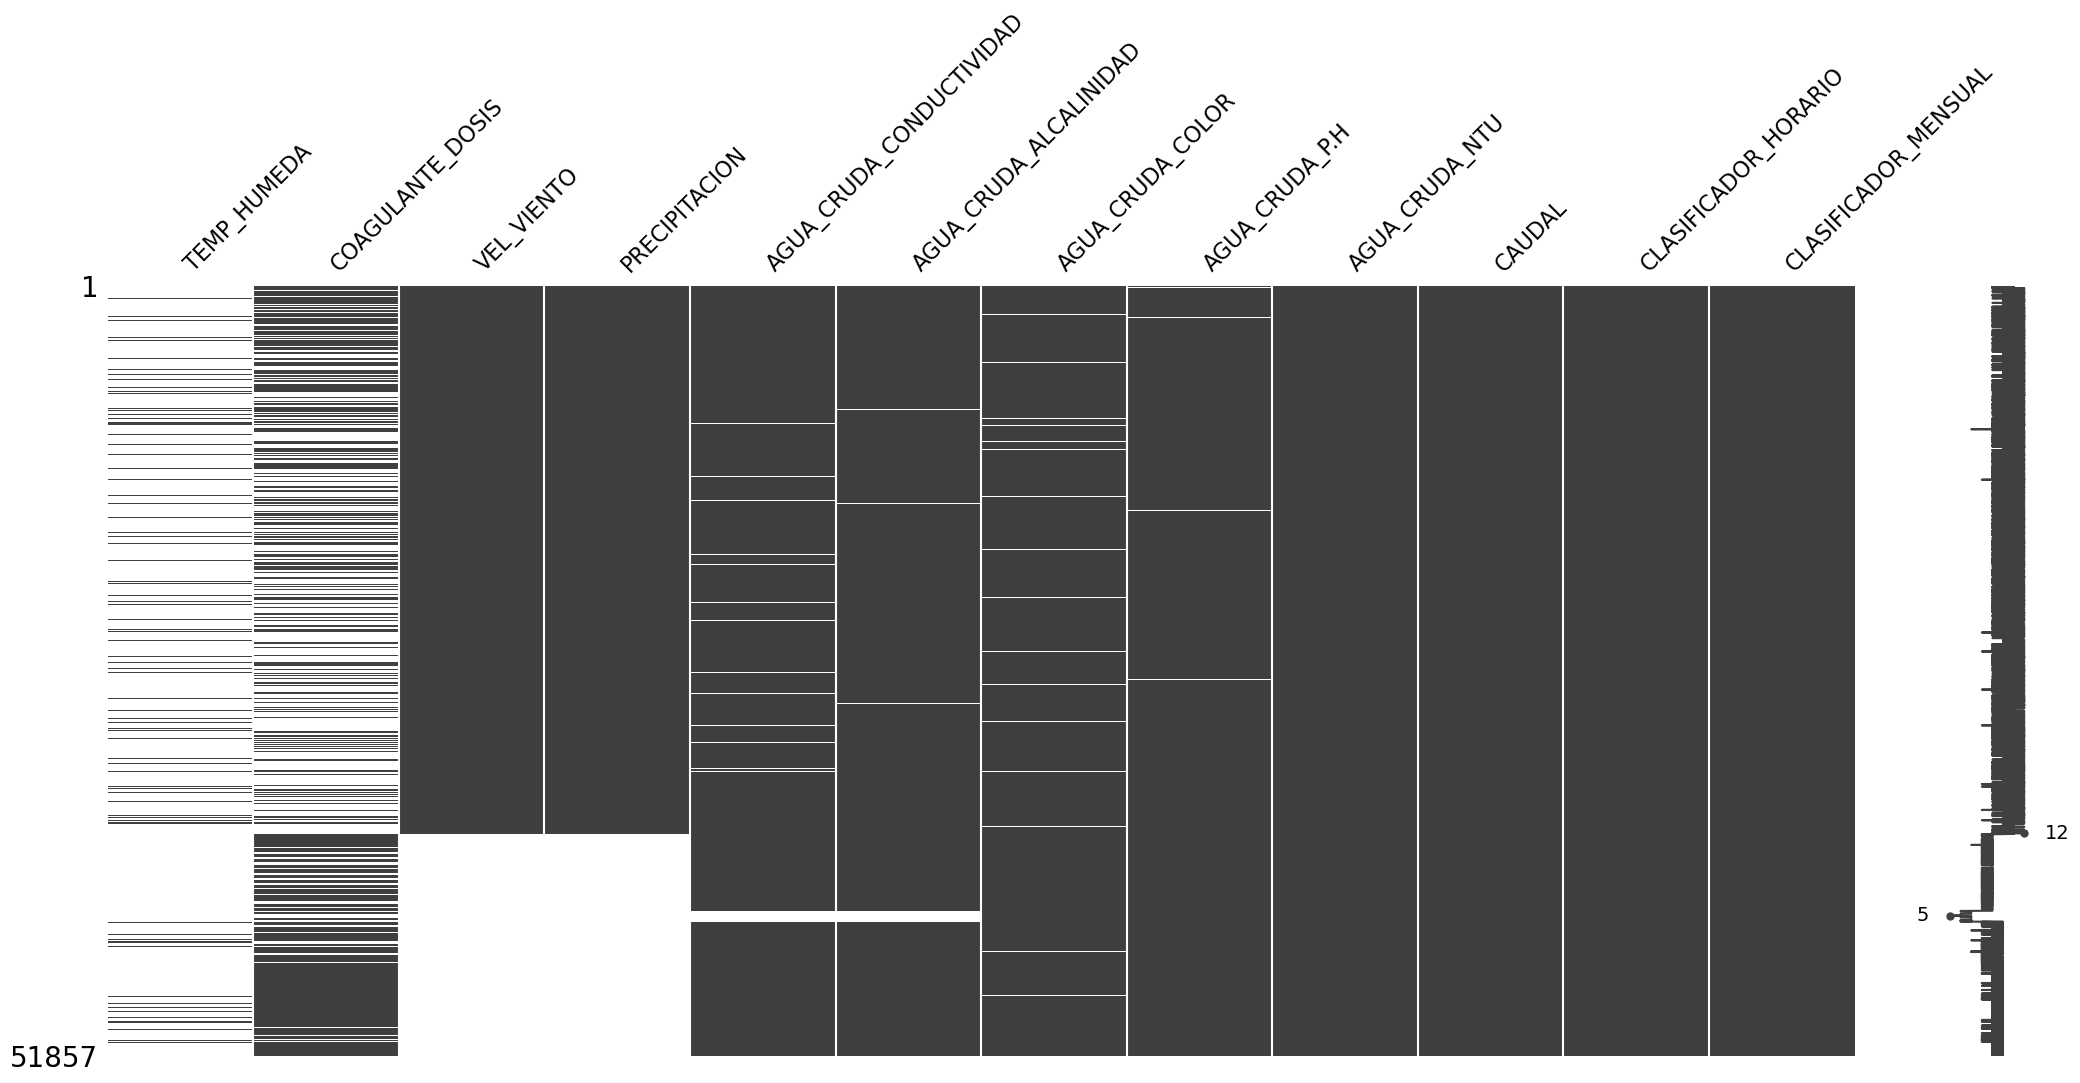

In [57]:
(
    df_2017
    .missing.sort_variables_by_missingness()
    .sort_values(by = "VEL_VIENTO")
    .pipe(missingno.matrix)
)

<AxesSubplot:>

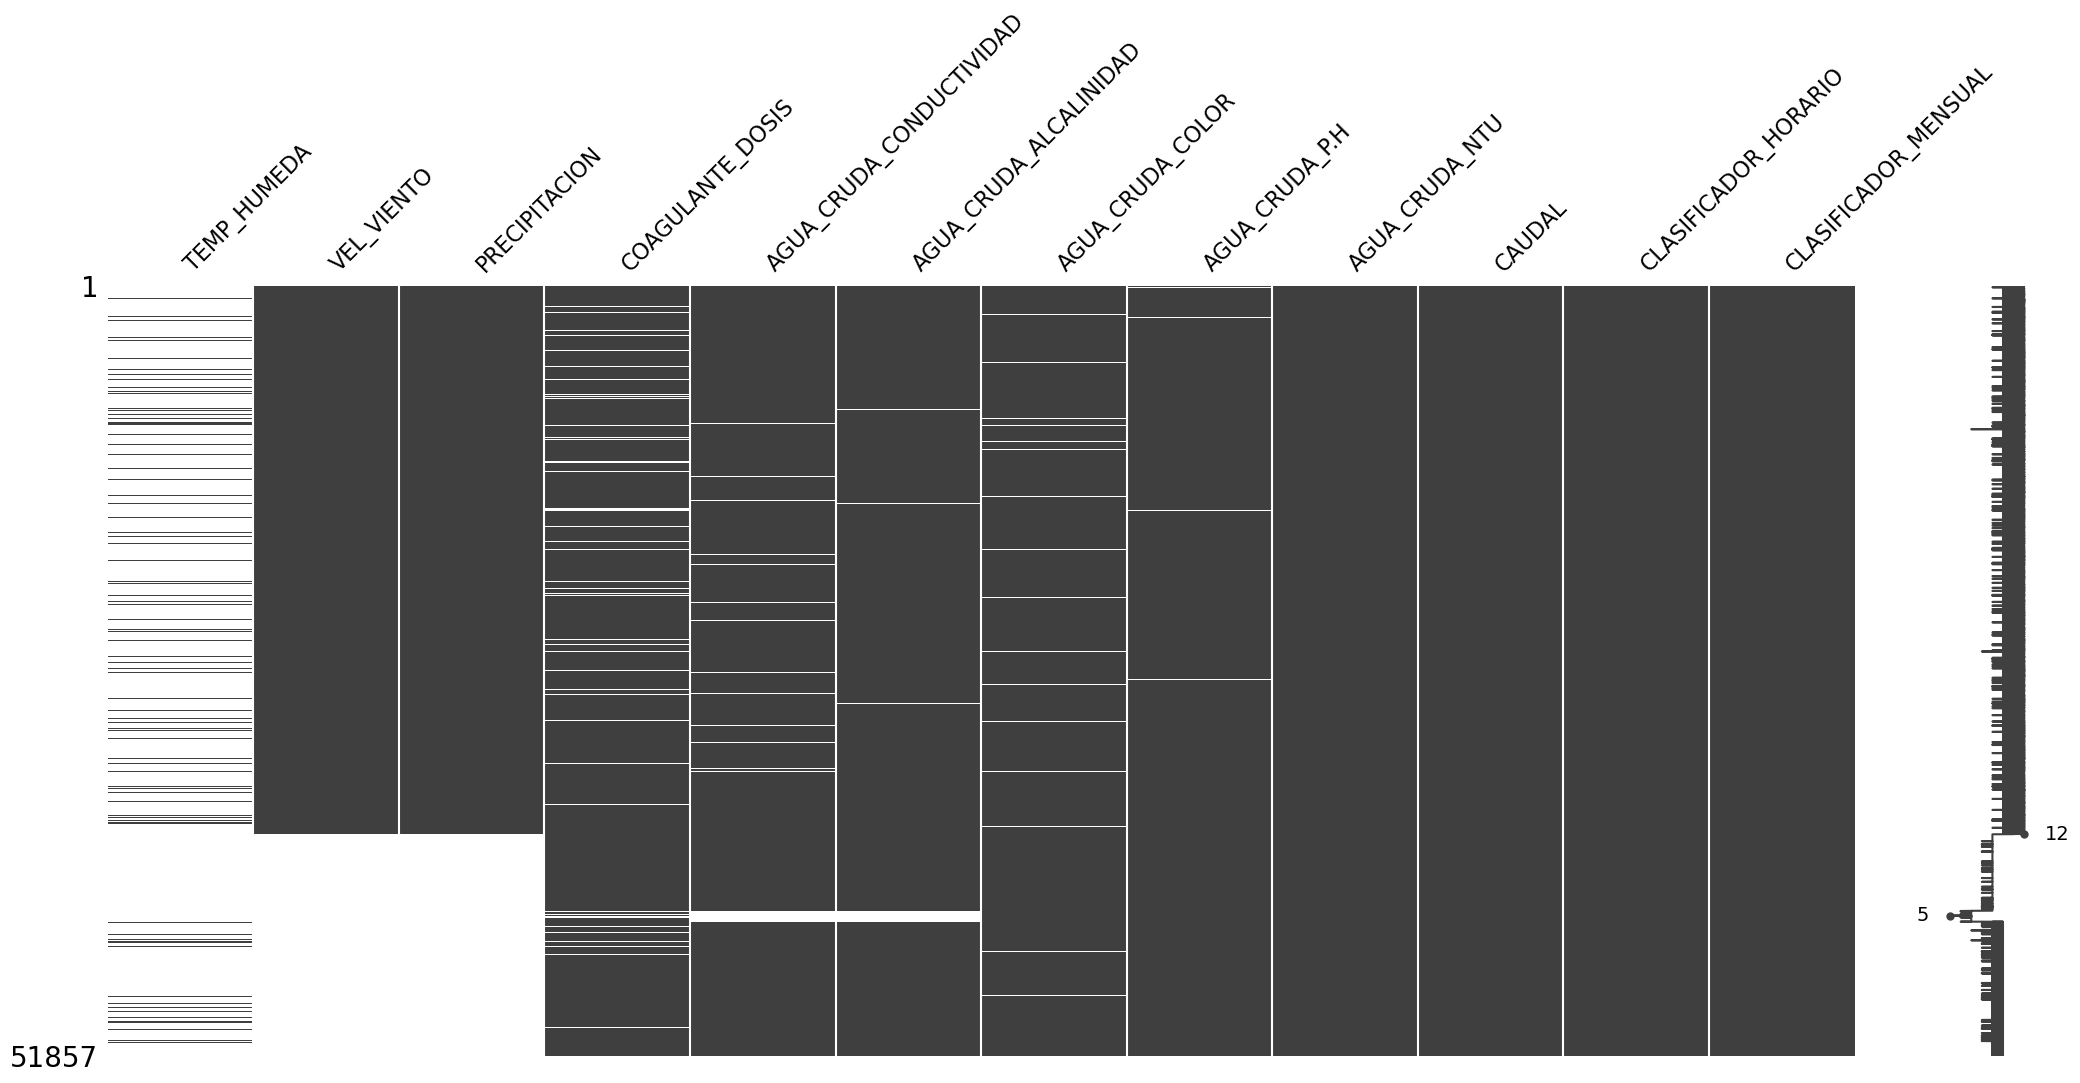

In [58]:
(
    df_edit_2017
    .missing.sort_variables_by_missingness()
    .sort_values(by = "VEL_VIENTO")
    .pipe(missingno.matrix)
)

### Concepto y aplicación de la matriz de sombras

**Construcción de la matriz de sombras**

In [59]:
(
    df
    .isna()
    .replace({
        False: "Not missing",
        True: "Missing"
    })
    .add_suffix("_NA")
    .pipe(
        lambda shadow_matrix: pd.concat(
            [df, shadow_matrix],
            axis = "columns"
        )
    )
)

,CAUDAL,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,COAGULANTE_DOSIS,VEL_VIENTO,PRECIPITACION,TEMP_HUMEDA,...,AGUA_CRUDA_COLOR_NA,AGUA_CRUDA_NTU_NA,AGUA_CRUDA_ALCALINIDAD_NA,AGUA_CRUDA_CONDUCTIVIDAD_NA,COAGULANTE_DOSIS_NA,VEL_VIENTO_NA,PRECIPITACION_NA,TEMP_HUMEDA_NA,CLASIFICADOR_HORARIO_NA,CLASIFICADOR_MENSUAL_NA
0,545.0,7.5,6.5,2.1,NaN,NaN,NaN,NaN,NaN,NaN,...,Not missing,Not missing,Missing,Missing,Missing,Missing,Missing,Missing,Not missing,Not missing
2,516.0,7.8,6.0,2.4,NaN,NaN,NaN,NaN,NaN,NaN,...,Not missing,Not missing,Missing,Missing,Missing,Missing,Missing,Missing,Not missing,Not missing
4,557.0,7.8,6.0,2.4,NaN,NaN,NaN,NaN,NaN,NaN,...,Not missing,Not missing,Missing,Missing,Missing,Missing,Missing,Missing,Not missing,Not missing
6,541.0,7.8,6.0,2.3,NaN,NaN,NaN,NaN,NaN,13.0,...,Not missing,Not missing,Missing,Missing,Missing,Missing,Missing,Not missing,Not missing,Not missing
8,540.0,7.8,6.0,2.3,NaN,NaN,NaN,NaN,NaN,NaN,...,Not missing,Not missing,Missing,Missing,Missing,Missing,Missing,Missing,Not missing,Not missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,600.0,7.4,425.0,657.0,25.0,55.5,40.0,NaN,NaN,NaN,...,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Missing,Missing,Not missing,Not missing
87644,620.0,7.5,321.0,404.0,25.0,55.7,40.0,NaN,NaN,NaN,...,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Missing,Missing,Not missing,Not missing
87645,620.0,7.3,322.0,402.0,25.0,55.4,40.0,NaN,NaN,NaN,...,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Missing,Missing,Not missing,Not missing
87646,510.0,7.4,300.0,390.0,25.0,55.5,40.0,NaN,NaN,NaN,...,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Missing,Missing,Not missing,Not missing


**Uso de función de utilería bind_shadow_matrix()**

In [60]:
(
    df
    .missing
    .bind_shadow_matrix(only_missing=True)
)

,CAUDAL,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,COAGULANTE_DOSIS,VEL_VIENTO,PRECIPITACION,TEMP_HUMEDA,...,CAUDAL_NA,AGUA_CRUDA_P.H_NA,AGUA_CRUDA_COLOR_NA,AGUA_CRUDA_NTU_NA,AGUA_CRUDA_ALCALINIDAD_NA,AGUA_CRUDA_CONDUCTIVIDAD_NA,COAGULANTE_DOSIS_NA,VEL_VIENTO_NA,PRECIPITACION_NA,TEMP_HUMEDA_NA
0,545.0,7.5,6.5,2.1,NaN,NaN,NaN,NaN,NaN,NaN,...,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing
2,516.0,7.8,6.0,2.4,NaN,NaN,NaN,NaN,NaN,NaN,...,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,557.0,7.8,6.0,2.4,NaN,NaN,NaN,NaN,NaN,NaN,...,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing
6,541.0,7.8,6.0,2.3,NaN,NaN,NaN,NaN,NaN,13.0,...,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Missing,Missing,Missing,Missing,Not Missing
8,540.0,7.8,6.0,2.3,NaN,NaN,NaN,NaN,NaN,NaN,...,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,600.0,7.4,425.0,657.0,25.0,55.5,40.0,NaN,NaN,NaN,...,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Missing,Missing
87644,620.0,7.5,321.0,404.0,25.0,55.7,40.0,NaN,NaN,NaN,...,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Missing,Missing
87645,620.0,7.3,322.0,402.0,25.0,55.4,40.0,NaN,NaN,NaN,...,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Missing,Missing
87646,510.0,7.4,300.0,390.0,25.0,55.5,40.0,NaN,NaN,NaN,...,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Missing,Missing


**Explorar estadísticos utilizando las nuevas columnas de la matriz de sombras**

In [61]:
(
    df
    .missing.bind_shadow_matrix(only_missing = True)
    .groupby(['COAGULANTE_DOSIS_NA'])
    ['AGUA_CRUDA_NTU']
    .describe()
    .reset_index()
)

,COAGULANTE_DOSIS_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,42530.0,2.448648,3.653582,0.4,1.9,2.3,2.7,400.0
1,Not Missing,43610.0,19.921929,46.074385,0.4,3.7,6.4,14.8,795.0


### Visualización de valores faltantes en una variable

<AxesSubplot:xlabel='COAGULANTE_DOSIS_NA', ylabel='AGUA_CRUDA_COLOR'>

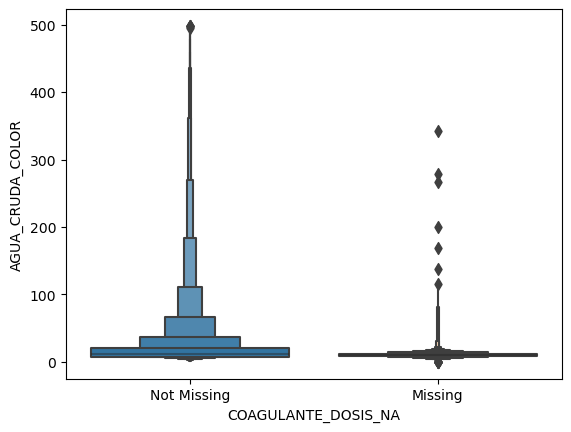

In [62]:
(
    df_edit
    .missing.bind_shadow_matrix(only_missing = True)
    .pipe(
        lambda df:
            sns.boxenplot(
                data = df,
                x = "COAGULANTE_DOSIS_NA",
                y = "AGUA_CRUDA_COLOR"
            )
    )
)

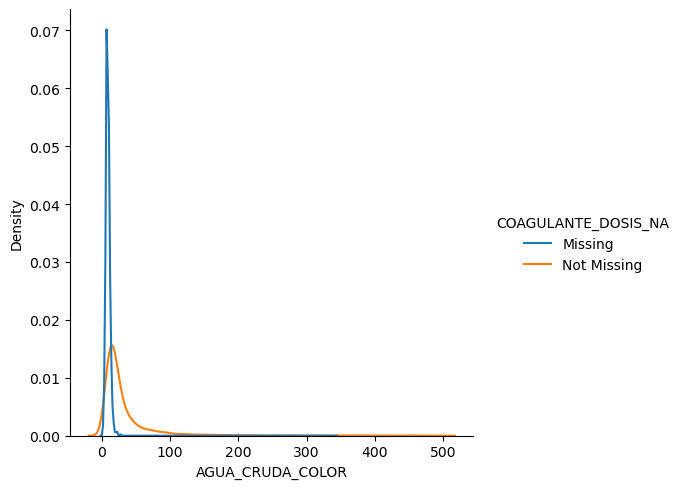

In [63]:
(
    df
    .missing.bind_shadow_matrix(only_missing = True)
    .pipe(
        lambda df:
            sns.displot(
                data = df,
                x = "AGUA_CRUDA_COLOR",
                hue = 'COAGULANTE_DOSIS_NA',
                kind ='kde'
            )
    )
)

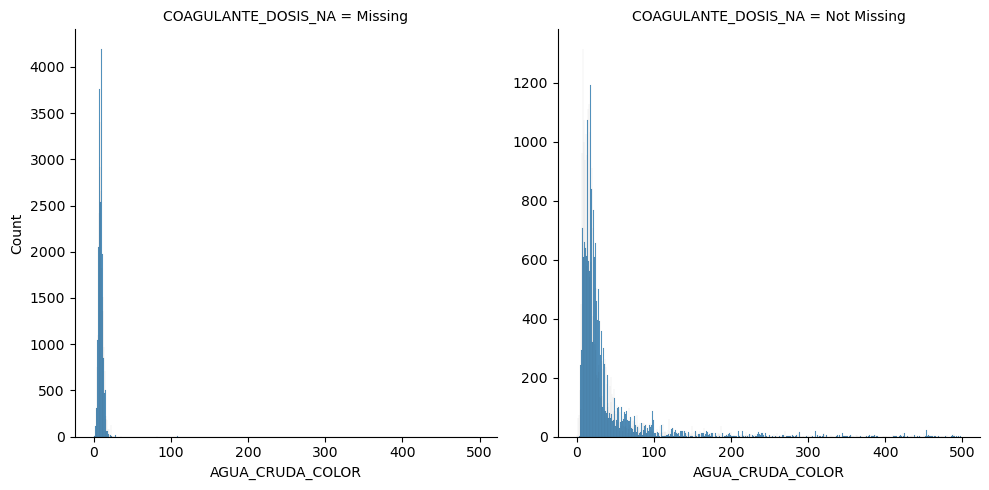

In [64]:
(
    df
    .missing.bind_shadow_matrix(only_missing = True)
    .pipe(
        lambda df:
            sns.displot(
                data = df,
                x = "AGUA_CRUDA_COLOR",
                col = 'COAGULANTE_DOSIS_NA',
                facet_kws = {
                    "sharey": False
                }
            )
    )
)

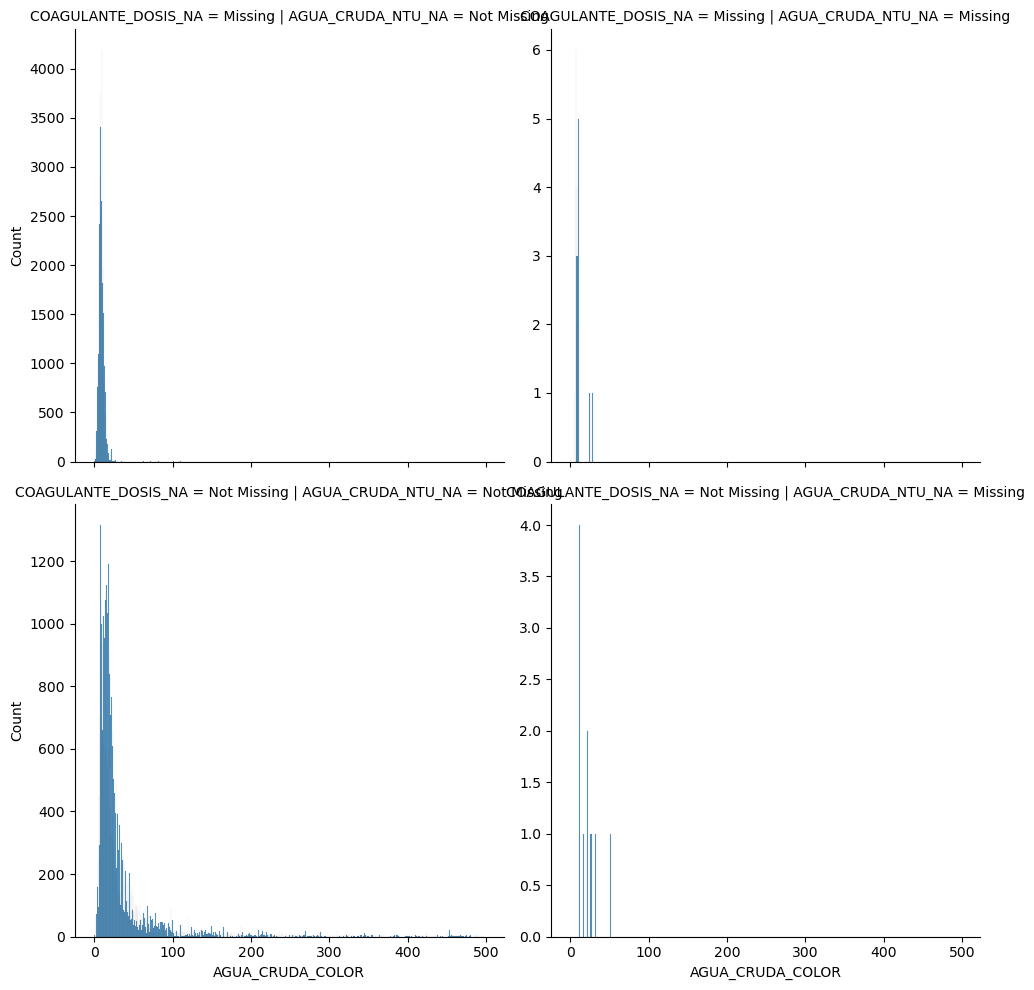

In [65]:
(
    df
    .missing.bind_shadow_matrix(only_missing = True)
    .pipe(
        lambda df:
            sns.displot(
                data = df,
                x = "AGUA_CRUDA_COLOR",
                col = 'AGUA_CRUDA_NTU_NA',
                row = 'COAGULANTE_DOSIS_NA',
                facet_kws = {
                    "sharey": False
                }
            )
    )
)

### Visualización de valores faltantes en dos variables

In [66]:
def column_fill_with_dummies(
    column: pd.Series,
    proportion_below: float=0.10,
    jitter: float=0.075,
    seed: int = 42
) -> pd.Series:
    
    column = column.copy(deep = True)
    
    # Extract values metadata.
    missing_mask = column.isna()
    number_missing_values = missing_mask.sum()
    column_range = column.max() - column.min()
    
    # Shift data.
    column_shift = column.min() - column.min() * proportion_below
    
    # Create the "jitter" (noise) to be added around the points.
    np.random.seed(seed)
    column_jitter = (np.random.rand(number_missing_values) - 2) * column_range * jitter
    
    # Save new dummy data.
    column[missing_mask] = column_shift + column_jitter
    
    return column

<AxesSubplot:xlabel='COAGULANTE_DOSIS', ylabel='AGUA_CRUDA_NTU'>

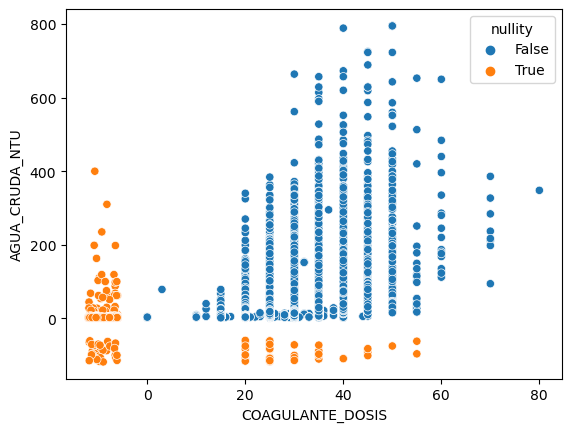

In [67]:
(
    df
    .select_dtypes(
        exclude = "category"
    )
    .pipe(
        lambda df: df[df.columns[df.isna().any()]]
    )
    .missing.bind_shadow_matrix(true_string = True, false_string = False)
    .apply(
        lambda column: column if "_NA" in column.name else column_fill_with_dummies(column, proportion_below = 0.05, jitter = 0.075)
    )
    .assign(
        nullity = lambda df: df.COAGULANTE_DOSIS_NA | df.AGUA_CRUDA_NTU_NA
    )
    .pipe(
        lambda df: (
            sns.scatterplot(
                data = df,
                x = "COAGULANTE_DOSIS",
                y = "AGUA_CRUDA_NTU",
                hue = "nullity"
            )
        )
    )
)

### Correlación de nulidad

<AxesSubplot:>

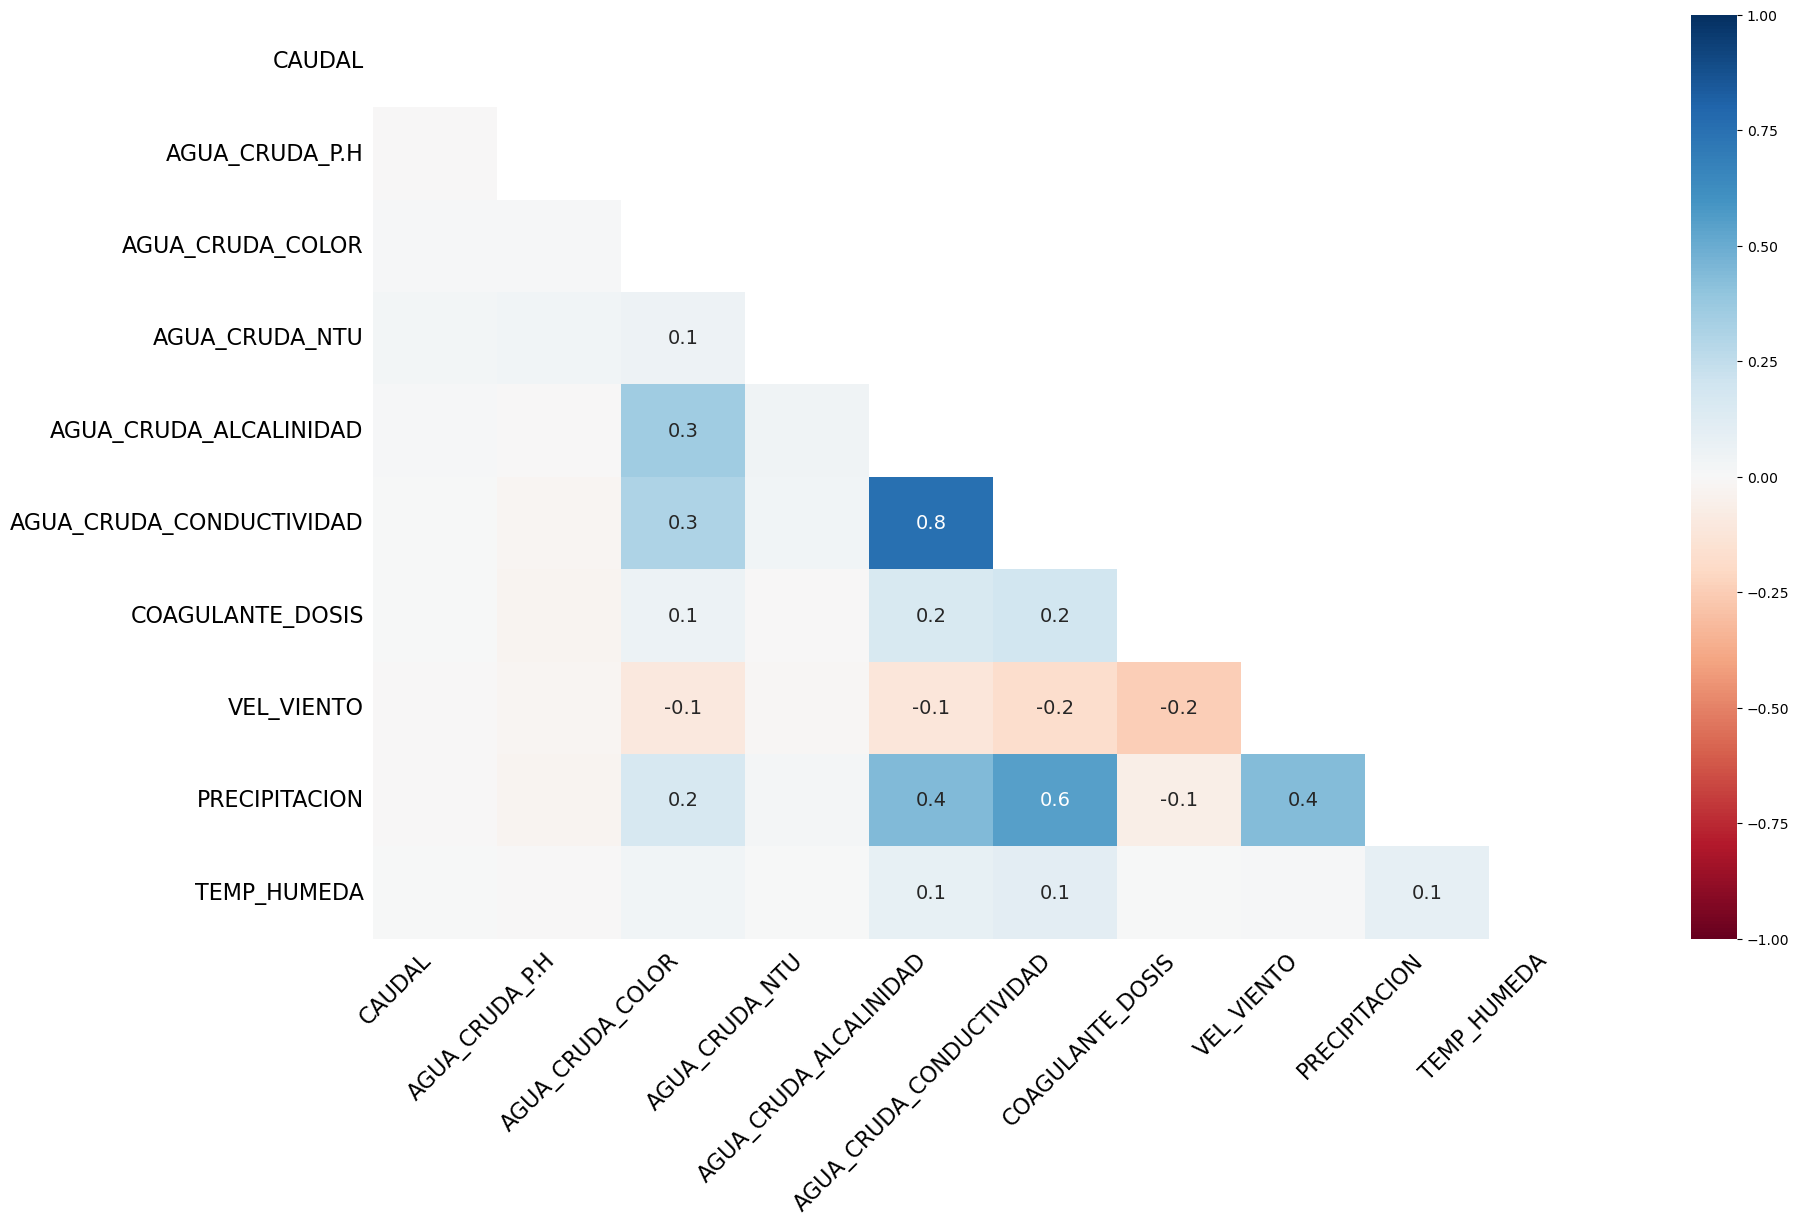

In [68]:
missingno.heatmap(
    df=df
)

<AxesSubplot:>

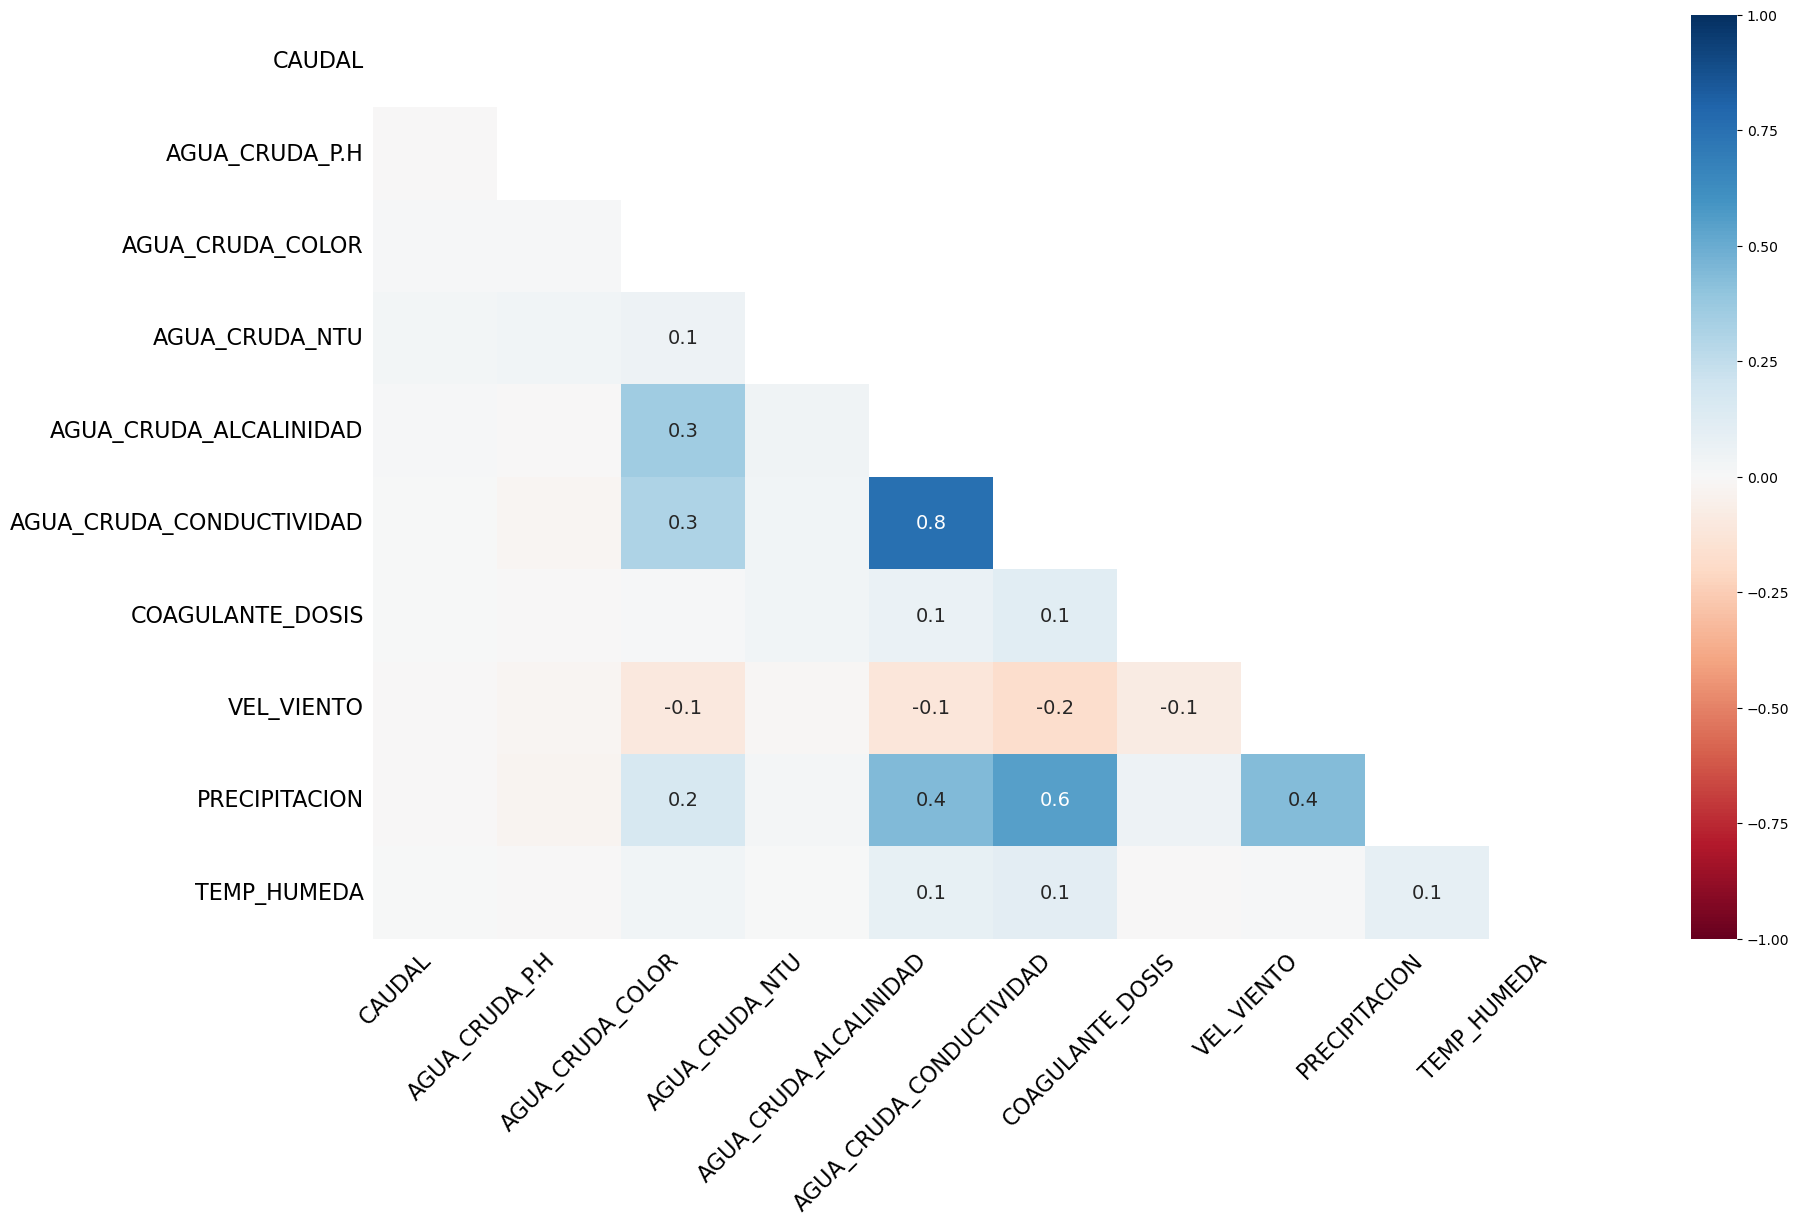

In [69]:
missingno.heatmap(
    df=df_edit
)

<AxesSubplot:>

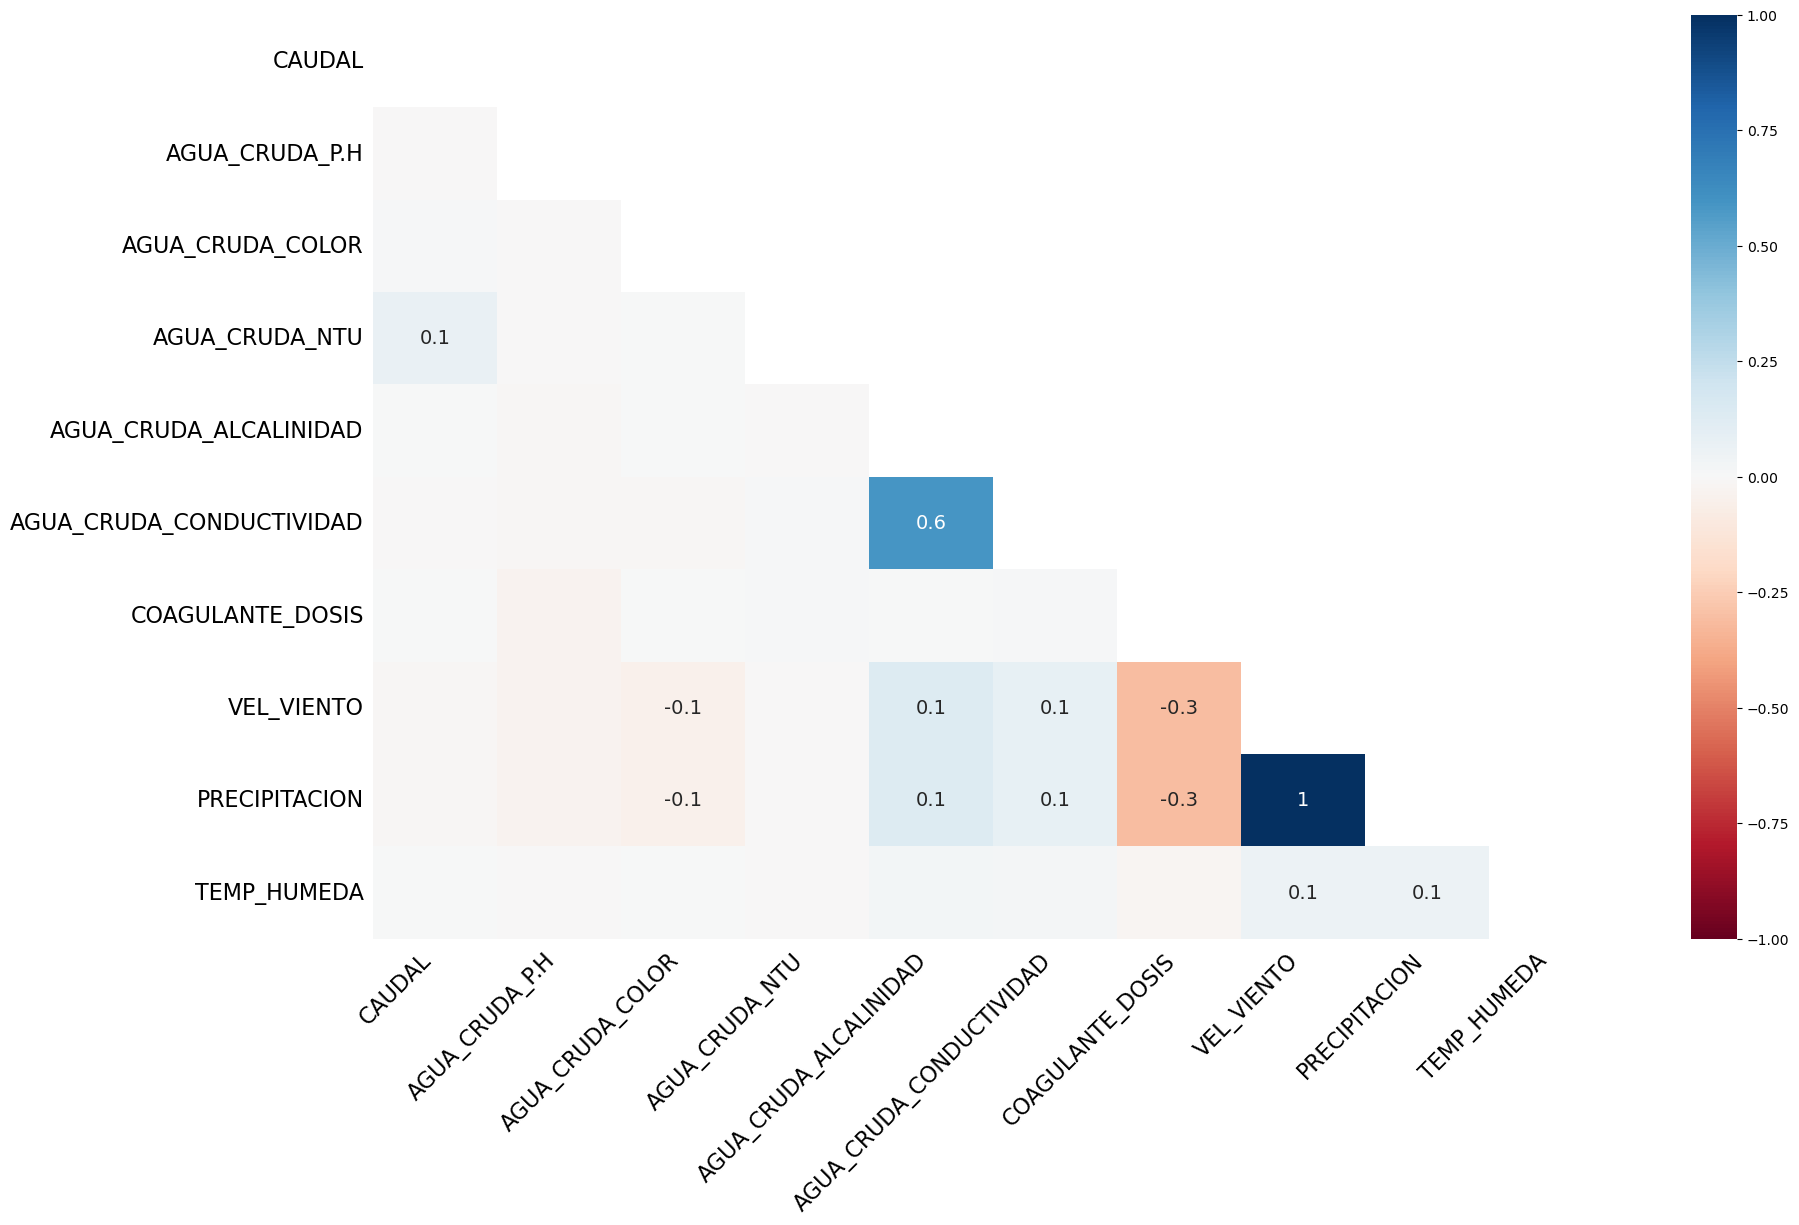

In [70]:
missingno.heatmap(
    df=df_2017
)

<AxesSubplot:>

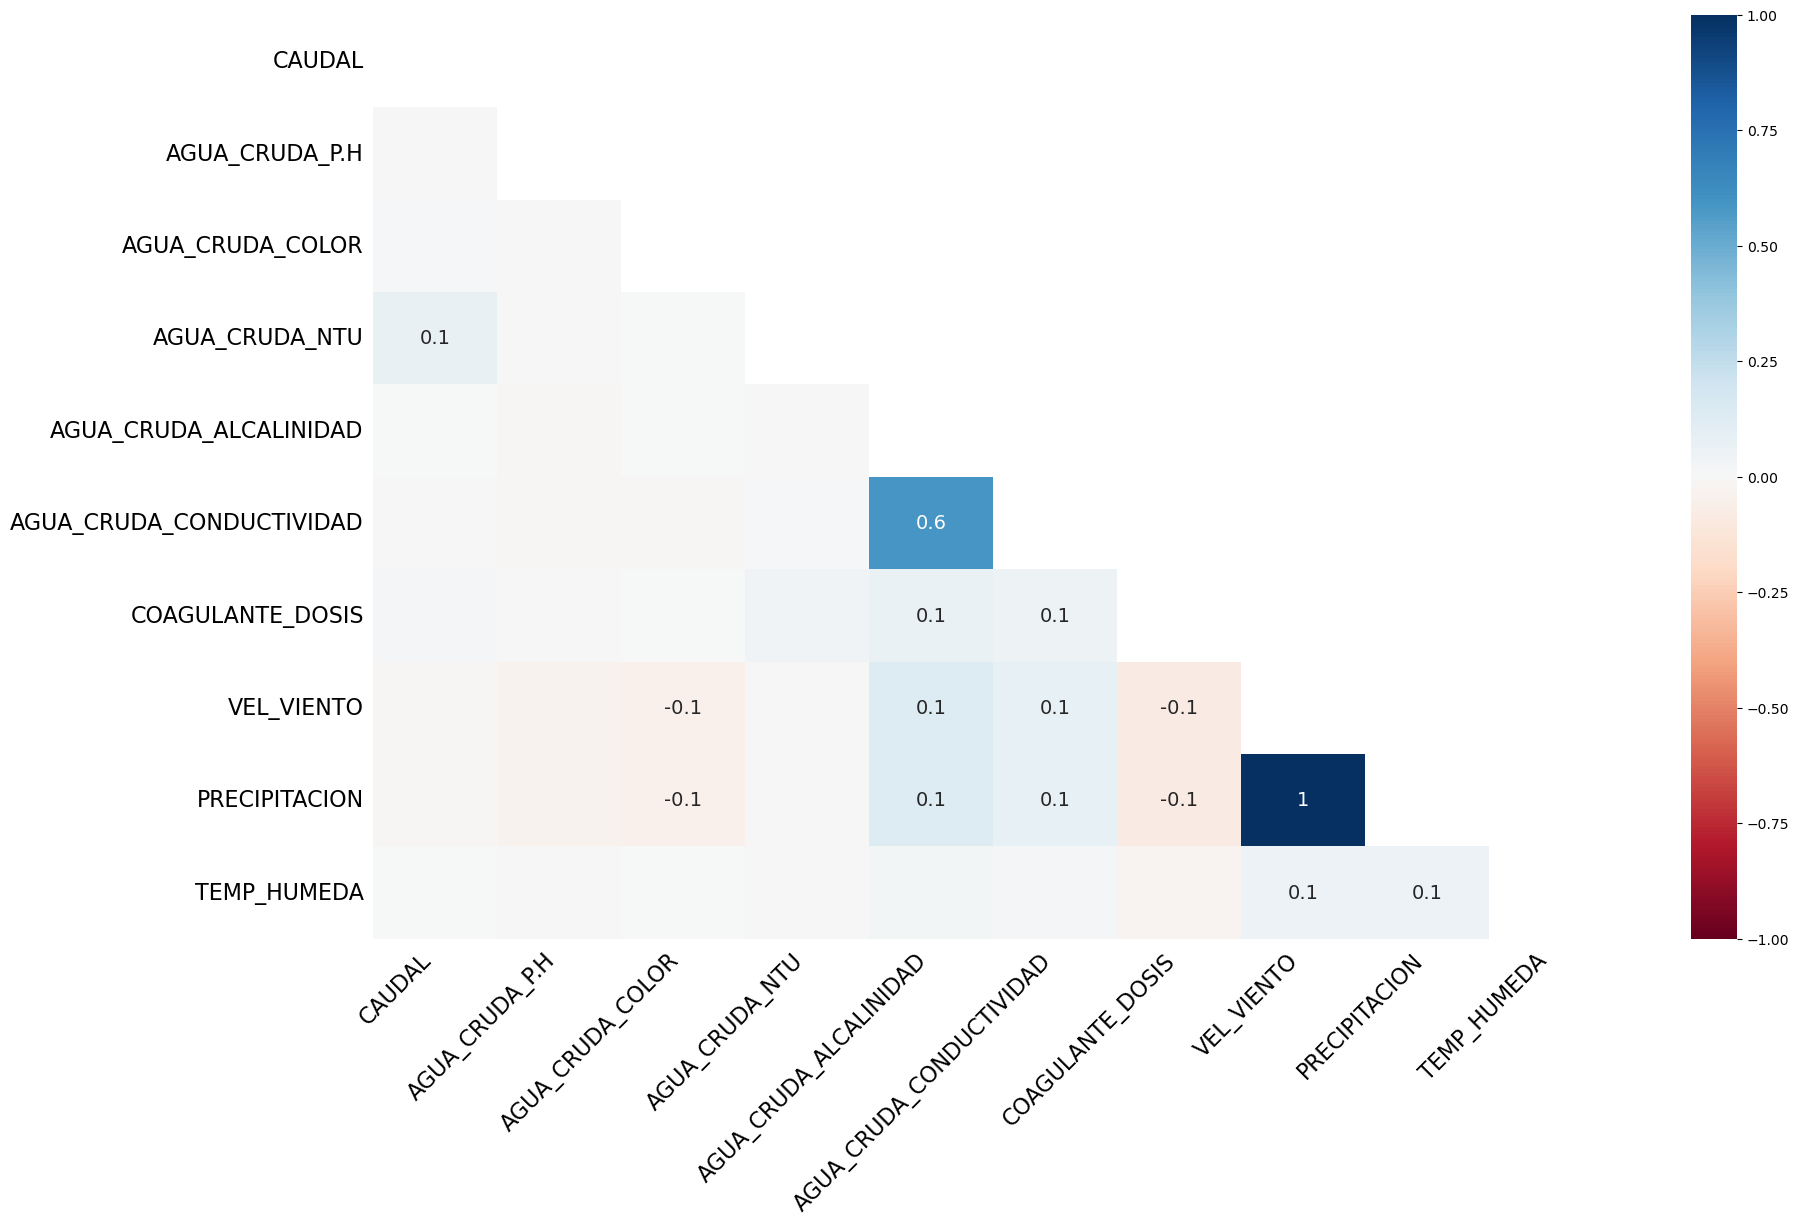

In [71]:
missingno.heatmap(
    df=df_edit_2017
)

<AxesSubplot:>

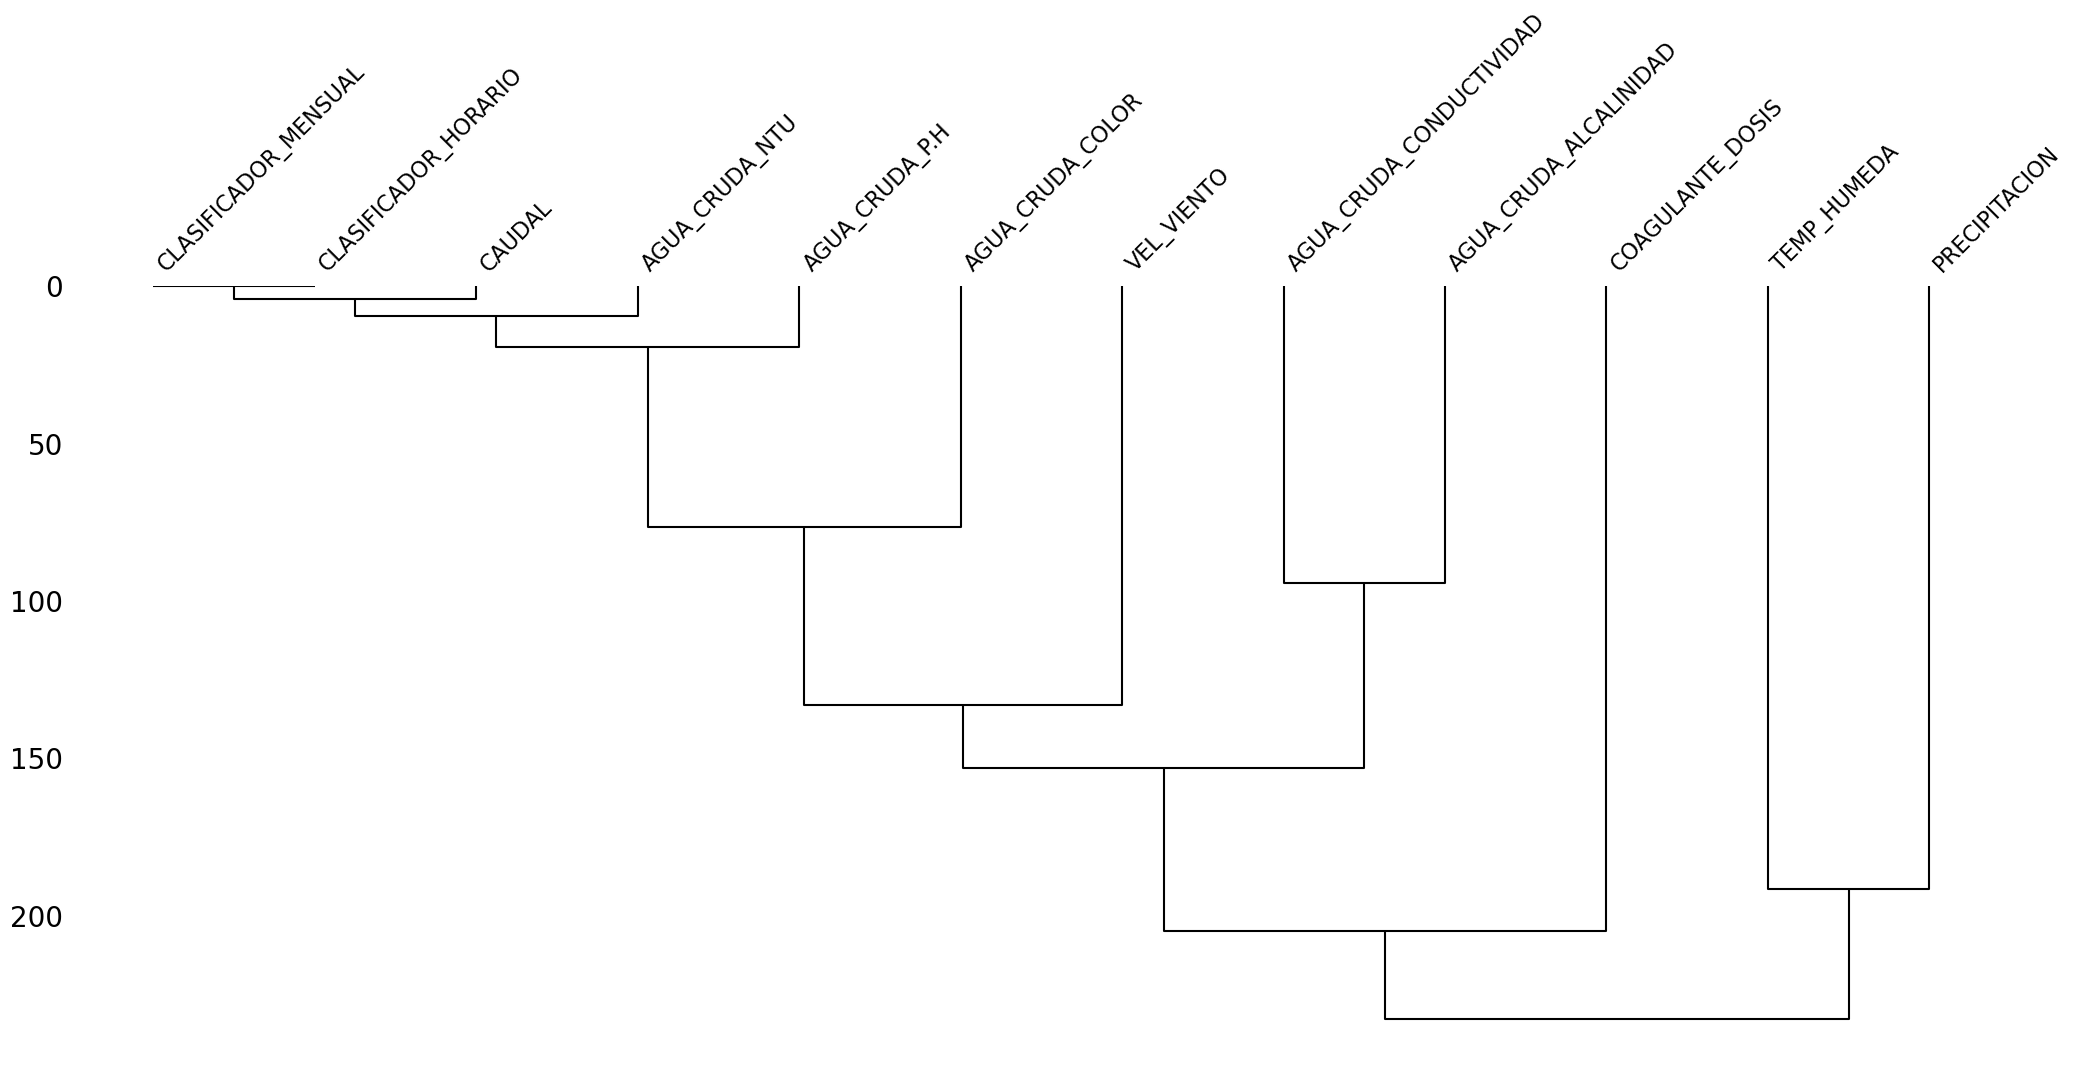

In [72]:
missingno.dendrogram(
    df = df
)

<AxesSubplot:>

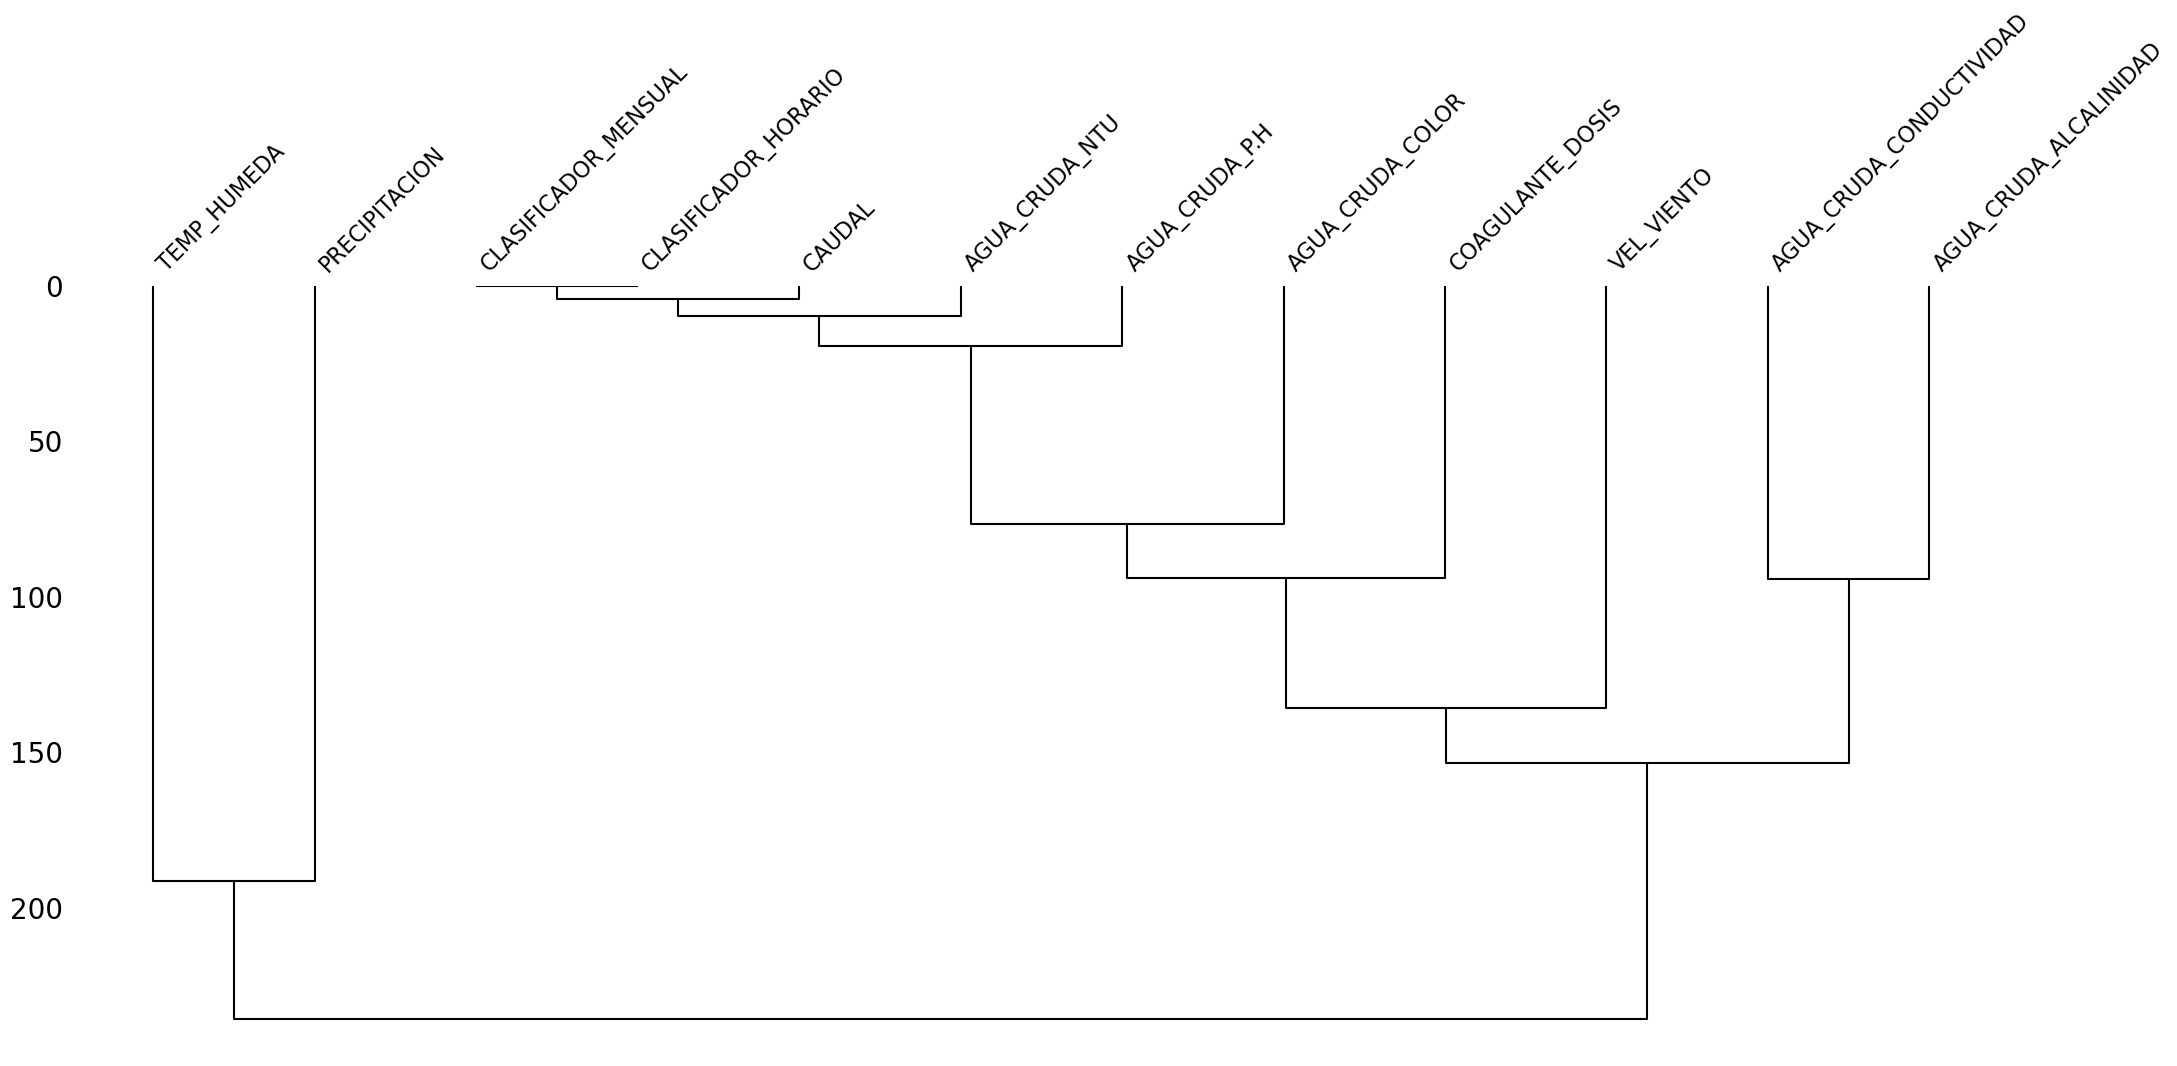

In [73]:
missingno.dendrogram(
    df = df_edit
)

<AxesSubplot:>

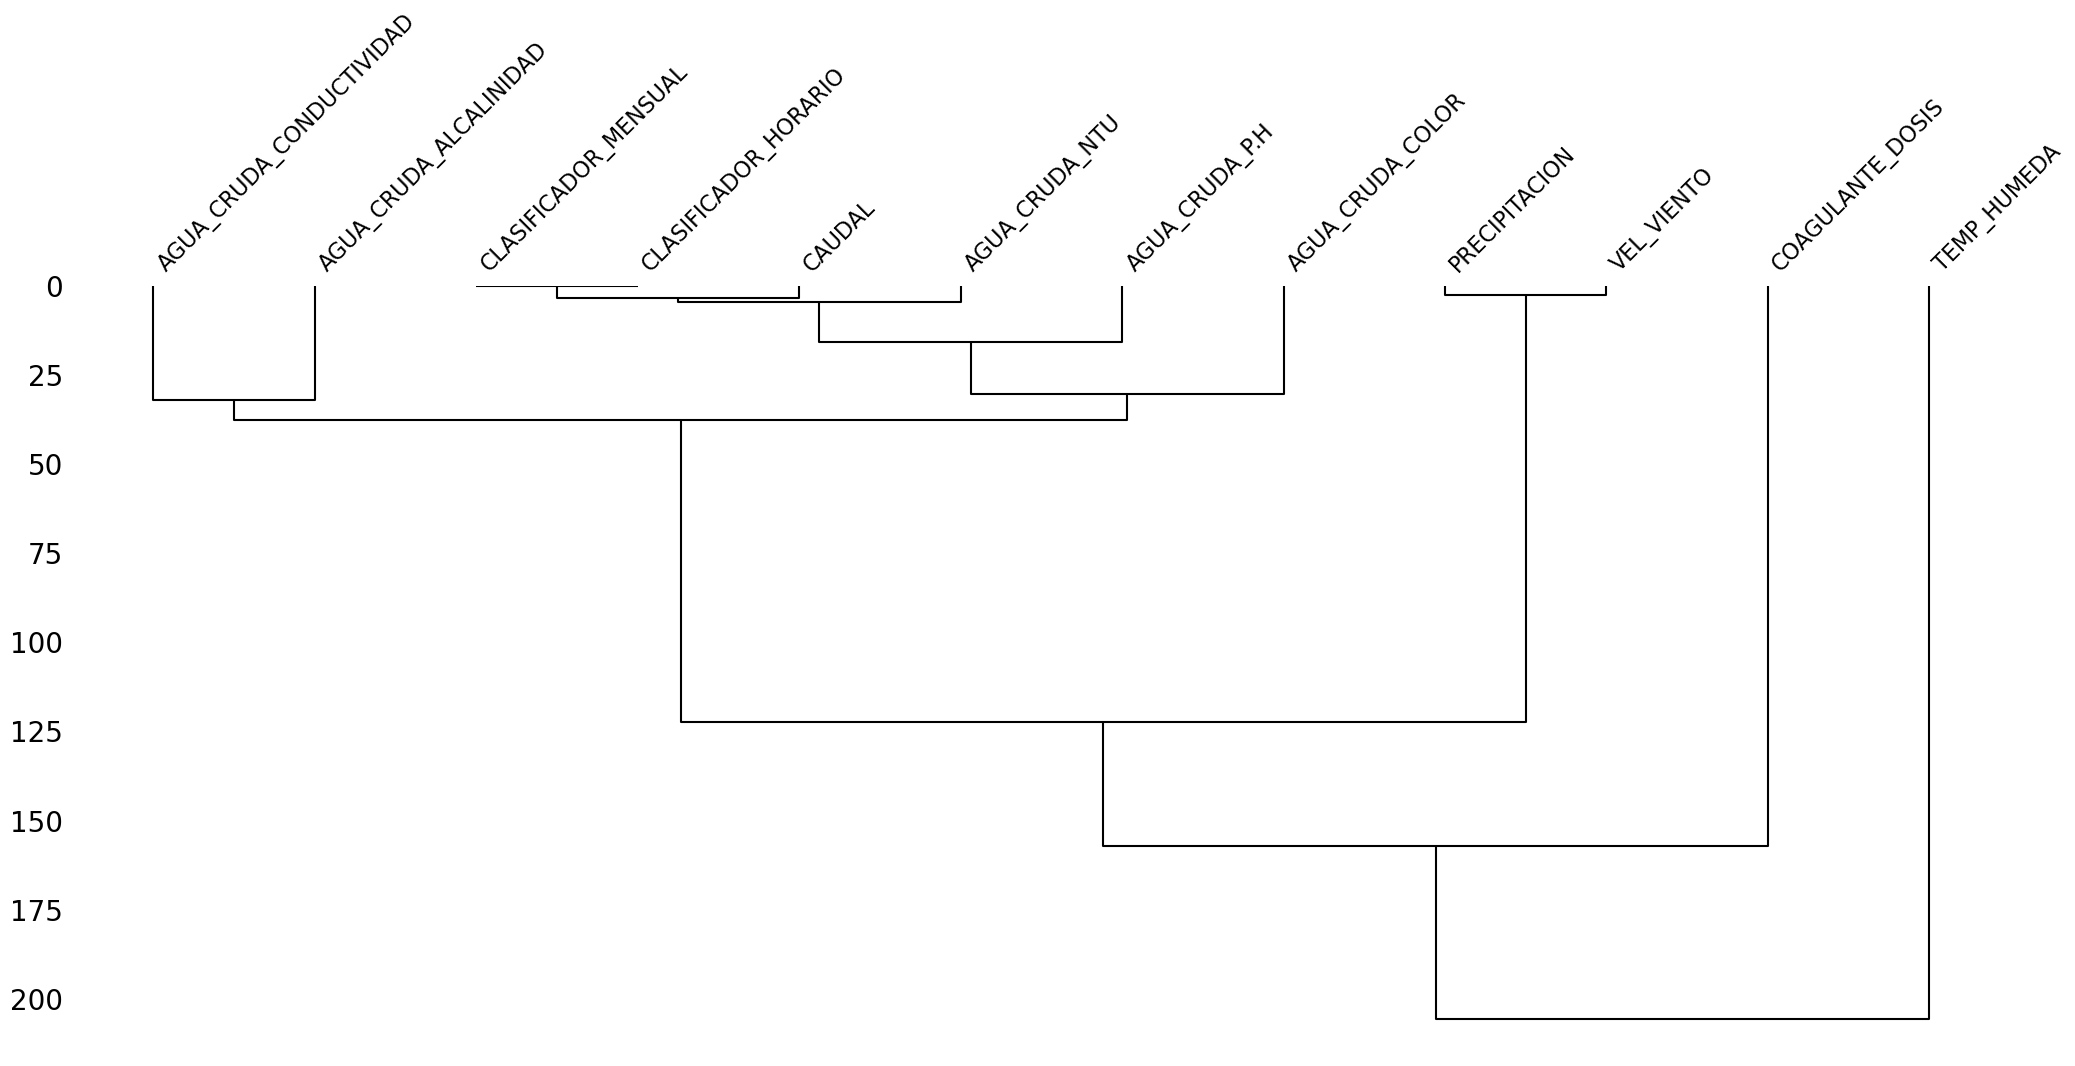

In [74]:
missingno.dendrogram(
    df = df_2017
)

<AxesSubplot:>

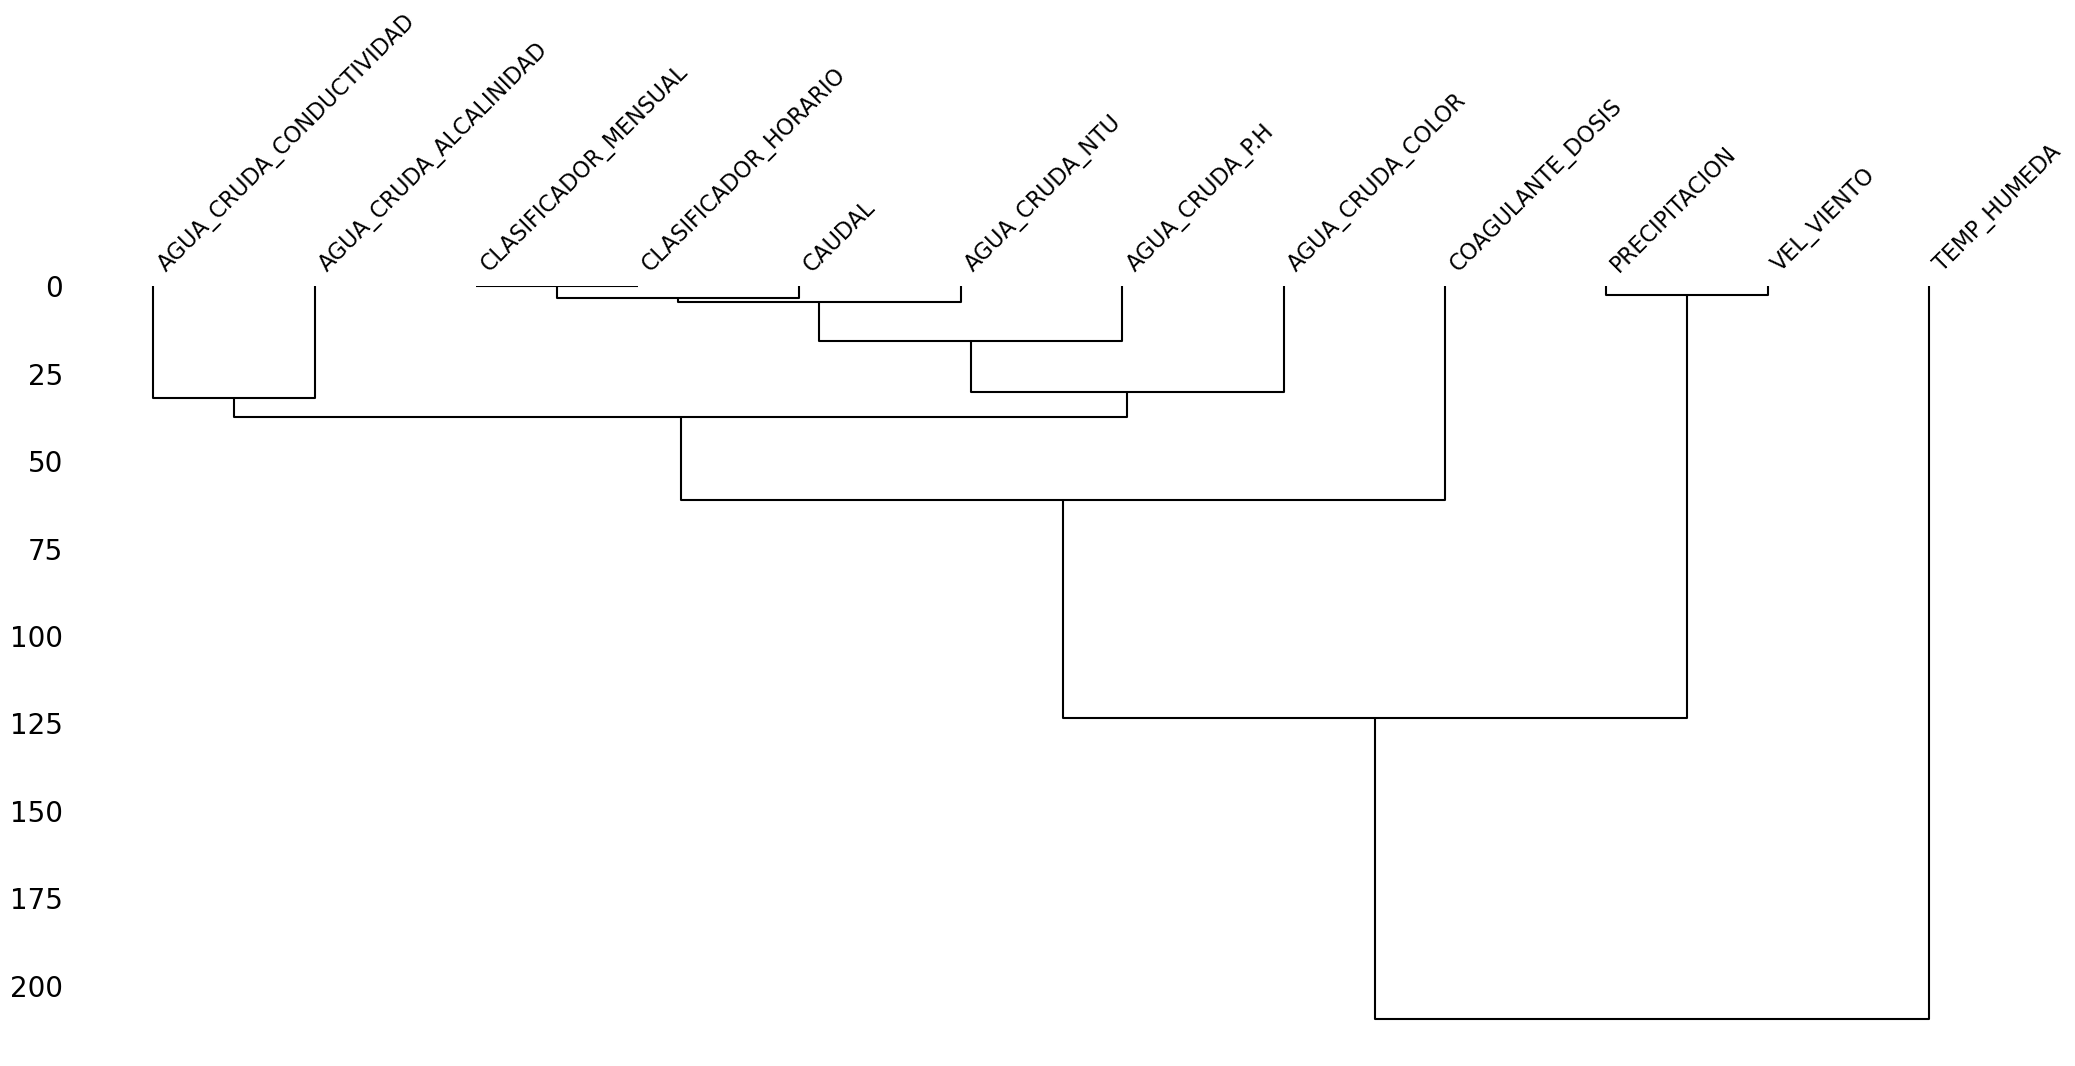

In [75]:
missingno.dendrogram(
    df = df_edit_2017
)